In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("LLCP2015.csv")
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1,1,1,1292015,1,29,2015,1200,2015000001,2015000001,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18,10.0,1,1,2.0,1.0,1.0,1.0,1,1.0,1.0,2,2.0,2,1,1.0,2.0,2,1,1.0,1,2,3.0,NaN,2,1,4,1,2.0,NaN,1.0,2.0,8,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1.0,NaN,NaN,3.0,11011,28.781560,3.0,86.344681,NaN,NaN,NaN,NaN,1,0.614125,341.384853,2,1,2,1,2.0,2.0,2,2,1,1.0,1,1,2,1,1,1,1.0,9,1,63,5,70.0,178.0,12701.0,4018.0,4.0,2,1,2,2,3,1,2,0,1,0,1,17.0,33.0,67.0,33.0,17.0,100.0,0,0,1,1,50.0,217.0,2,1,1,1,0,0,2,NaN,NaN,2469,423

In [4]:
null_columns = df[['CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES', 'LADULT', 'CTELNUM1', 'CELLFON2', 'CCLGHOUS', 'NUMPHON2', 'INSULIN', 'BLDSUGAR', 'FEETCHK2', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK', 'EYEEXAM', 'DIABEYE', 'DIABEDU', 'PAINACT2', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'CRGVREL1', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB1', 'CRGVPERS', 'CRGVHOUS', 'CRGVMST2', 'VIDFCLT2', 'VIREDIF3', 'VIPRFVS2', 'VINOCRE2', 'VIEYEXM2', 'VIINSUR2', 'VICTRCT4', 'VIGLUMA2', 'VIMACDG2', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS', 'WTCHSALT', 'LONGWTCH', 'DRADVISE', 'ASTHMAGE', 'ASATTACK', 'ASERVIST', 'ASDRVIST', 'ASRCHKUP', 'ASACTLIM', 'ASYMPTOM', 'ASNOSLEP', 'ASTHMED3', 'ASINHALR', 'HAREHAB1', 'STREHAB1', 'CVDASPRN', 'ASPUNSAF', 'RLIVPAIN', 'RDUCHART', 'RDUCSTRK', 'ARTTODAY', 'ARTHWGT', 'ARTHEXER', 'ARTHEDU', 'TETANUS', 'HPVADVC2', 'HPVADSHT', 'SHINGLE2', 'HADMAM', 'HOWLONG', 'HADPAP2', 'LASTPAP2', 'HPVTEST', 'HPLSTTST', 'HADHYST2', 'PROFEXAM', 'LENGEXAM', 'LSTBLDS3', 'HADSGCO1', 'LASTSIG3', 'PCPSAAD2', 'PCPSADI1', 'PCPSARE1', 'PSATEST1', 'PSATIME', 'PCPSARS1', 'PCPSADE1', 'PCDMDECN', 'SCNTPAID', 'SCNTWRK1', 'SCNTLPAD', 'SCNTLWK1', 'CASTHNO2', 'EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', 'MISTMNT',
                                'ADANXEV', 'EXACTOT1', 'EXACTOT2','DIABAGE2', 'NUMHHOL2','CPDEMO1','PREGNANT','STOPSMK2','CRGVEXPT','SCNTMNY1','SCNTMEL1','HADSIGM3','BLDSTOOL','CASTHDX2','_CRACE1','_CPRACE','_CLLCPWT','_DUALUSE','_LLCPWT']]
null_counts = null_columns.isnull().sum()
df.drop(null_columns, axis = 1, inplace =True)
df.rename(columns = {'Unnamed: 0':'Patient_ID'}, inplace=True)
pd.set_option('display.max_columns', None)
df

,Patient_ID,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CELLFON3,NUMADULT,NUMMEN,NUMWOMEN,CADULT,PVTRESD2,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,SEX,MARITAL,EDUCA,RENTHOM1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,CAREGIV1,CIMEMLOS,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_DUALCOR,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1,1,1,1292015,1,29,2015,1200,2015000001,2015000001,2.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18,10.0,1,1,2.0,1.0,1.0,1.0,1,1.0,1.0,2,2.0,2,1,1.0,2.0,2,1,1.0,1,2,3.0,2,1,4,1,2.0,8,88.0,3.0,2.0,280.0,510.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,10,1.0,3.0,11011,28.781560,3.0,86.344681,NaN,0.614125,2,1,2,1,2.0,2.0,2,2,1,1.0,1,1,2,1,1,1,1.0,9,1,63,5,70.0,178.0,12701.0,4018.0,4.0,2,1,2,2,3,1,2,0,1,0,1,17.0,33.0,67.0,33.0,17.0,100.0,0,0,1,1,50.0,217.0,2,1,1,1,0,0,2,NaN,NaN,2469,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,4,2,3,3,2,2,4,2,1.0,1.0,1.0,1,1,NaN,NaN,1.0
1,2,1,1,1202015,1,20,2015,1100,2015000002,2015000002,2.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,88.0,88,NaN,2,1,1.0,4.0,3.0,NaN,1,4.0,2.0,2,2.0,2,2,NaN,2.0,2,2,2.0,2,2,3.0,2,2,6,1,2.0,3,88.0,1.0,1.0,165.0,508.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,NaN,3.0,888.0,NaN,NaN,NaN,302.0,305.0,302.0,202.0,202.0,304.0,1.0,64.0,212.0,100.0,69.0,212.0,100.0,888.0,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,2.0,2.0,NaN,NaN,2.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,10,1.0,5.0,11011,28.781560,1.0,28.781560,NaN,NaN,1,2,1,2,1.0,2.0,1,1,3,2.0,1,1,2,1,1,1,1.0,7,1,52,4,68.0,173.0,7484.0,2509.0,3.0,2,1,4,1,1,2,2,0,1,0,1,7.0,17.0,7.0,29.0,29.0,13.0,0,0,1,1,24.0,78.0,2,2,1,1,0,0,1,35.0,0.0,2876,493,1.0,0.0,60.0,60.0,2800.0,2800.0,168.0,0.0,0.0,0,168.0,0.0,168.0,0.0,0.0,0.0,2,1,1,2,2,2,2,2,3.0,3.0,4.0,2,2,NaN,NaN,2.0
2,3,1,1,2012015,2,1,2015,1200,2015000003,2015000003,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,15.0,88,88.0,1,2,2.0,1.0,3.0,NaN,1,1.0,1.0,7,2.0,1,2,NaN,2.0,1,2,1.0,2,2,3.0,2,2,4,1,2.0,7,88.0,99.0,2.0,158.0,511.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,10,1.0,5.0,11011,28.781560,2.0,57.563120,NaN,0.614125,2,9,1,1,2.0,NaN,1,1,3,1.0,1,1,2,1,1,1,1.0,11,2,71,6,71.0,180.0,7167.0,2204.0,2.0,1,1,2,9,9,9,9,900,9,99900,9,NaN,NaN,NaN,NaN,NaN,NaN,2,4,0,0,NaN,NaN,9,9,1,1,1,1,9,NaN,NaN,2173,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,9,9,9,9,9,9,9,9,9.0,

The Segmentation of patients based on their health behaviors: grouping individuals who have simil ar patterns. And for that we're gonna need these features:
* Physical activity (EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH)
* Alcohol Consumption (ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,DRNKANY5)
* Mental Health (MENTHLTH,ADANXEV,QLSTRES2,ADSLEEP,ADDOWN,)
* Diet and Nutrition (FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1)
* Heart Disease (BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,HAREHAB1,STREHAB1,_MICHD)
* Cancer (CHCSCNCR,HADMAM,HOWLONG,HADPAP2)
* Diabetes (DIABETE3,DIABAGE2)
* Smoking habits (SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,_SMOKER3,_RFSMOK3)


In [5]:
data = df[['Patient_ID','SEX','MARITAL','EDUCA','WEIGHT2','HEIGHT3','_INCOMG','_BMI5','_AGEG5YR','GENHLTH','EXERANY2','EXRACT11','EXEROFT1','EXERHMM1','EXRACT21','EXEROFT2','EXERHMM2','STRENGTH','ALCDAY5','AVEDRNK2','DRNK3GE5','MAXDRNKS','DROCDY3_','_RFBING5','_DRNKWEK','_RFDRHV5','DRNKANY5','MENTHLTH','FRUITJU1','FRUIT1','FVBEANS','FVGREEN','FVORANG','VEGETAB1','FTJUDA1_','FRUTDA1_','BEANDAY_','GRENDAY_','ORNGDAY_','VEGEDA1_','_FRUTSUM','_VEGESUM','_FRTLT1','_VEGLT1','BPHIGH4','BPMEDS','BLOODCHO','CHOLCHK','TOLDHI2','CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD','CHCSCNCR','DIABETE3','SMOKE100','SMOKDAY2','USENOW3','_SMOKER3','_RFSMOK3','PHYSHLTH']]
data

,Patient_ID,SEX,MARITAL,EDUCA,WEIGHT2,HEIGHT3,_INCOMG,_BMI5,_AGEG5YR,GENHLTH,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,DRNKANY5,MENTHLTH,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,_MICHD,CHCSCNCR,DIABETE3,SMOKE100,SMOKDAY2,USENOW3,_SMOKER3,_RFSMOK3,PHYSHLTH
0,1,2,1,4,280.0,510.0,2,4018.0,9,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,888.0,NaN,NaN,NaN,0,1,0,1,2,18,305.0,310.0,320.0,310.0,305.0,101.0,17.0,33.0,67.0,33.0,17.0,100.0,50.0,217.0,2,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,3,1,15.0
1,2,2,2,6,165.0,508.0,1,2509.0,7,3.0,1.0,64.0,212.0,100.0,69.0,212.0,100.0,888.0,888.0,NaN,NaN,NaN,0,1,0,1,2,88,302.0,305.0,302.0,202.0,202.0,304.0,7.0,17.0,7.0,29.0,29.0,13.0,24.0,78.0,2,2,3.0,NaN,1,4.0,2.0,2,2.0,2,2.0,2.0,3.0,1.0,1.0,3.0,1,2,88.0
2,3,2,2,4,158.0,511.0,9,2204.0,11,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900,9,99900,9,9,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9,3.0,NaN,1,1.0,1.0,7,2.0,1,NaN,2.0,3.0,NaN,NaN,NaN,9,9,15.0
3,4,2,1,4,180.0,507.0,5,2819.0,9,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,888.0,NaN,NaN,NaN,0,1,0,1,2,30,555.0,101.0,555.0,301.0,301.0,201.0,0.0,100.0,0.0,3.0,3.0,14.0,100.0,20.0,1,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,2.0,NaN,3.0,4,1,30.0
4,5,2,1,5,142.0,504.0,9,2437.0,9,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,888.0,NaN,NaN,NaN,0,1,0,1,2,88,777.0,102.0,203.0,204.0,310.0,320.0,NaN,200.0,43.0,57.0,33.0,67.0,NaN,200.0,9,1,3.0,NaN,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,NaN,3.0,4,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,441452,2,3,2,104.0,503.0,2,1842.0,11,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,888.0,NaN,NaN,NaN,0,1,0,1,2,88,202.0,555.0,205.0,555.0,201.0,201.0,29.0,0.0,71.0,0.0,14.0,14.0,29.0,99.0,2,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,1.0,2.0,NaN,3.0,4,1,88.0
441452,441453,2,1,5,160.0,503.0,1,2834.0,2,1.0,1.0,64.0,105.0,30.0,88.0,NaN,NaN,888.0,888.0,NaN,NaN,NaN,0,1,0,1,2,88,305.0,101.0,202.0,303.0,201.0,202.0,17.0,100.0,29.0,10.0,14.0,29.0,117.0,82.0,1,2,3.0,NaN,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,NaN,3.0,4,1,88.0
441453,441454,2,1,4,247.0,505.0,3,4110.0,11,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,2.0,88.0,2.0,7,1,93,1,1,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,3,1,88.0
441454,441455,1,5,5,166.0,511.0,1,2315.0,7,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,888.0,NaN,NaN,NaN,0,1,0,1,2,88,101.0,101.0,101.0,202.0,301.0,301.0,100.0,100.0,100.0,29.0,3.0,3.0,200.0,135.0,1,1,1.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,NaN,3.0,4,1,88.0


(array([22073., 22073., 22073., 22072., 22073., 22073., 22073., 22072.,
        22073., 22073., 22073., 22072., 22073., 22073., 22073., 22072.,
        22073., 22073., 22073., 22073.]),
 array([1.0000000e+00, 2.2073750e+04, 4.4146500e+04, 6.6219250e+04,
        8.8292000e+04, 1.1036475e+05, 1.3243750e+05, 1.5451025e+05,
        1.7658300e+05, 1.9865575e+05, 2.2072850e+05, 2.4280125e+05,
        2.6487400e+05, 2.8694675e+05, 3.0901950e+05, 3.3109225e+05,
        3.5316500e+05, 3.7523775e+05, 3.9731050e+05, 4.1938325e+05,
        4.4145600e+05]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Patient_ID')

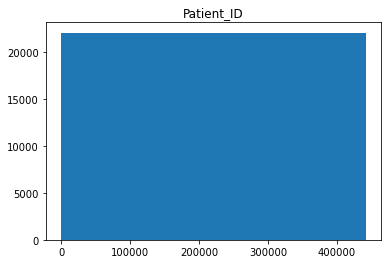

(array([186938.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0., 254518.]),
 array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
        1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'SEX')

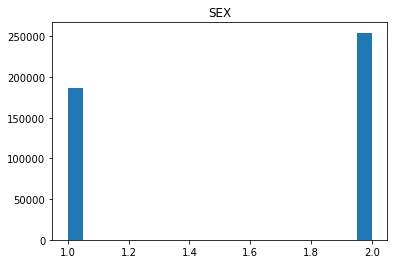

(array([233210.,      0.,  59406.,      0.,      0.,  56481.,      0.,
          8968.,      0.,      0.,  67668.,      0.,  12627.,      0.,
             0.,      0.,      0.,      0.,      0.,   3096.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'MARITAL')

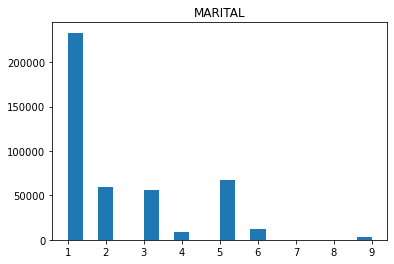

(array([   609.,      0.,  11187.,      0.,      0.,  22463.,      0.,
        123227.,      0.,      0., 120528.,      0., 161631.,      0.,
             0.,      0.,      0.,      0.,      0.,   1811.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EDUCA')

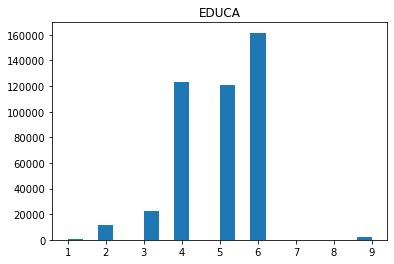

(array([4.09454e+05, 2.27000e+02, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.69400e+03, 0.00000e+00, 0.00000e+00, 8.61000e+02, 1.79040e+04]),
 array([  50.  ,  547.45, 1044.9 , 1542.35, 2039.8 , 2537.25, 3034.7 ,
        3532.15, 4029.6 , 4527.05, 5024.5 , 5521.95, 6019.4 , 6516.85,
        7014.3 , 7511.75, 8009.2 , 8506.65, 9004.1 , 9501.55, 9999.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'WEIGHT2')

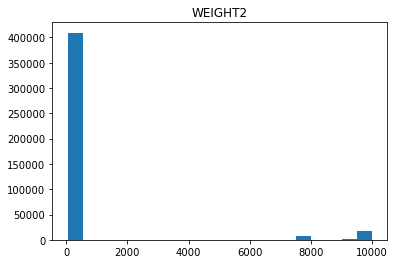

(array([4.24161e+05, 4.10000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.77600e+03, 0.00000e+00, 1.00000e+00, 1.83400e+03, 5.73200e+03]),
 array([ 200.  ,  689.95, 1179.9 , 1669.85, 2159.8 , 2649.75, 3139.7 ,
        3629.65, 4119.6 , 4609.55, 5099.5 , 5589.45, 6079.4 , 6569.35,
        7059.3 , 7549.25, 8039.2 , 8529.15, 9019.1 , 9509.05, 9999.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'HEIGHT3')

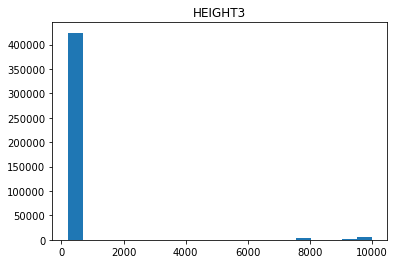

(array([ 38048.,      0.,  59174.,      0.,      0.,  39235.,      0.,
         52052.,      0.,      0., 173442.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  79505.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_INCOMG')

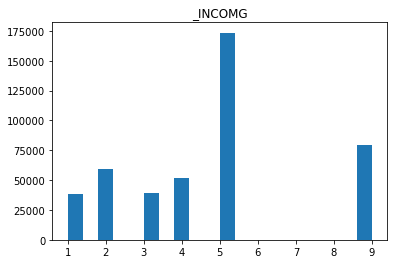

(array([1.12100e+03, 3.08340e+04, 1.18153e+05, 1.26425e+05, 7.20250e+04,
        3.15610e+04, 1.33940e+04, 5.95500e+03, 2.54800e+03, 1.12400e+03,
        5.04000e+02, 2.62000e+02, 1.02000e+02, 2.19000e+02, 1.96000e+02,
        2.93000e+02, 1.80000e+02, 5.70000e+01, 8.10000e+01, 2.40000e+01]),
 array([1202.  , 1641.65, 2081.3 , 2520.95, 2960.6 , 3400.25, 3839.9 ,
        4279.55, 4719.2 , 5158.85, 5598.5 , 6038.15, 6477.8 , 6917.45,
        7357.1 , 7796.75, 8236.4 , 8676.05, 9115.7 , 9555.35, 9995.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_BMI5')

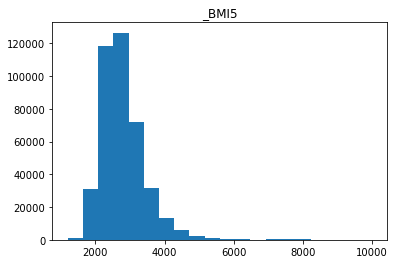

(array([24192., 19746.,     0., 22917., 24545.,     0., 25942., 30276.,
            0., 39881., 46209.,     0., 49794., 49264.,     0., 38362.,
        28232.,     0., 36760.,  5336.]),
 array([ 1.  ,  1.65,  2.3 ,  2.95,  3.6 ,  4.25,  4.9 ,  5.55,  6.2 ,
         6.85,  7.5 ,  8.15,  8.8 ,  9.45, 10.1 , 10.75, 11.4 , 12.05,
        12.7 , 13.35, 14.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_AGEG5YR')

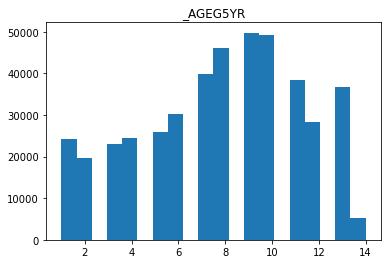

(array([ 76032.,      0., 145065.,      0.,      0., 136975.,      0.,
         58962.,      0.,      0.,  23175.,      0.,      0.,      0.,
             0.,    799.,      0.,      0.,      0.,    446.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'GENHLTH')

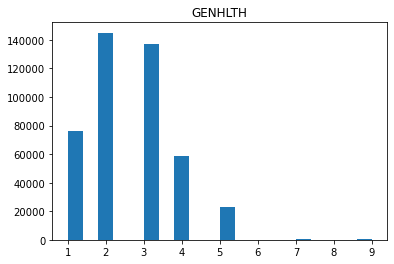

(array([296020.,      0., 107444.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,    602.,      0.,      0.,      0.,   1946.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXERANY2')

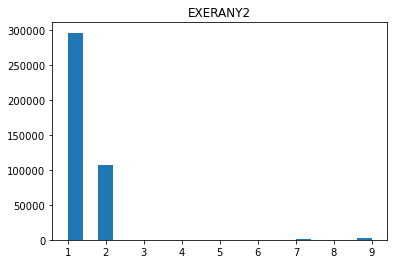

(array([  9026.,  15165.,  11774.,  21923.,   3775.,   3027.,   2131.,
         20294.,    349.,   1525.,   2473.,   4513., 163359.,  14042.,
          4109.,   5846.,      0.,      0.,      0.,  12447.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXRACT11')

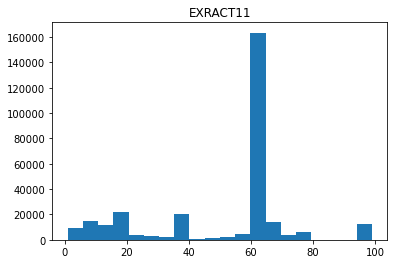

(array([2.07435e+05, 6.00000e+01, 8.24550e+04, 1.09200e+03, 1.23000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.27500e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.85000e+02]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXEROFT1')

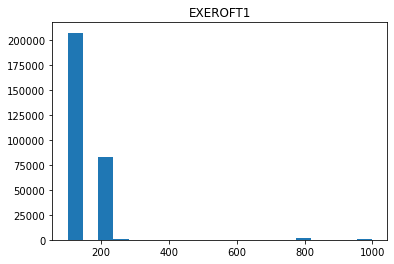

(array([1.62642e+05, 6.53480e+04, 1.61120e+04, 2.01000e+04, 2.37800e+03,
        8.15500e+03, 5.20000e+02, 6.21200e+03, 5.87000e+02, 8.00000e+00,
        2.33900e+03, 3.00000e+00, 1.61600e+03, 3.50000e+01, 2.96000e+02,
        5.52100e+03, 9.35000e+02, 1.00000e+00, 3.13000e+02, 5.44000e+02]),
 array([  1. ,  50.9, 100.8, 150.7, 200.6, 250.5, 300.4, 350.3, 400.2,
        450.1, 500. , 549.9, 599.8, 649.7, 699.6, 749.5, 799.4, 849.3,
        899.2, 949.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXERHMM1')

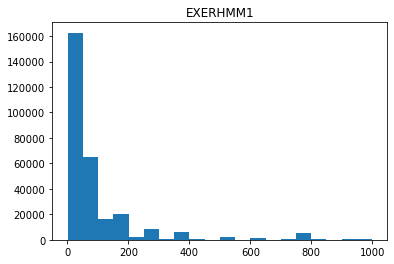

(array([ 6932., 15522., 12088., 18899.,  3730.,  2158.,  3610.,  9813.,
          355.,  2460.,  4730.,  6267., 42901., 23392., 18910., 13209.,
            0., 92337.,     0., 15967.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXRACT21')

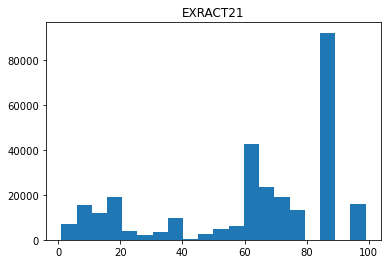

(array([1.29377e+05, 1.33000e+02, 6.46910e+04, 4.04000e+02, 9.10000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.81000e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.10000e+02]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXEROFT2')

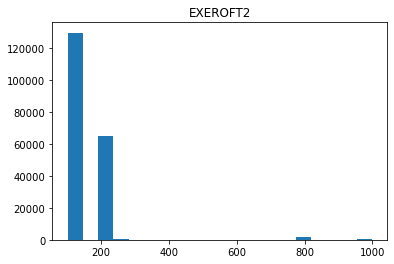

(array([9.9984e+04, 4.2540e+04, 9.2150e+03, 1.8350e+04, 1.9780e+03,
        7.8890e+03, 4.2800e+02, 5.8250e+03, 3.7700e+02, 4.0000e+00,
        2.0980e+03, 3.0000e+00, 1.6610e+03, 7.8000e+01, 3.1800e+02,
        3.9770e+03, 1.0620e+03, 4.0000e+00, 3.8400e+02, 5.5900e+02]),
 array([  1. ,  50.9, 100.8, 150.7, 200.6, 250.5, 300.4, 350.3, 400.2,
        450.1, 500. , 549.9, 599.8, 649.7, 699.6, 749.5, 799.4, 849.3,
        899.2, 949.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXERHMM2')

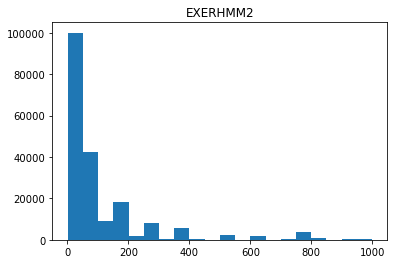

(array([1.02697e+05, 3.50000e+01, 5.00950e+04, 2.04000e+02, 4.40000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.78800e+03, 0.00000e+00, 2.44368e+05, 0.00000e+00, 2.50500e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'STRENGTH')

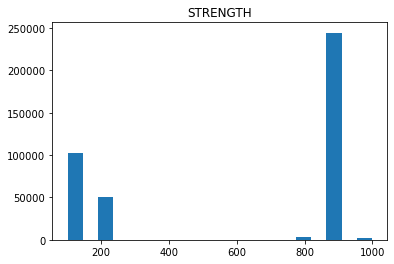

(array([ 57496.,      0., 153850.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   3095.,      0., 208460.,      0.,   2624.]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'ALCDAY5')

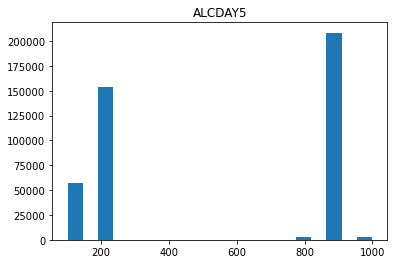

(array([1.97031e+05, 8.29300e+03, 1.33300e+03, 2.75000e+02, 1.06000e+02,
        1.43000e+02, 6.00000e+00, 2.40000e+01, 5.00000e+00, 9.00000e+00,
        8.00000e+00, 2.00000e+00, 1.90000e+01, 0.00000e+00, 2.00000e+00,
        2.83300e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.49000e+02]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'AVEDRNK2')

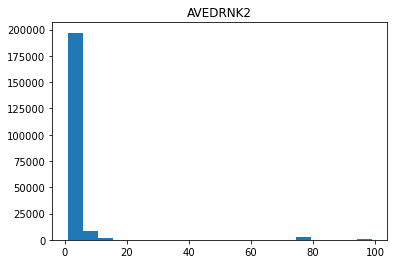

(array([4.19660e+04, 4.65900e+03, 1.26000e+03, 6.69000e+02, 2.69000e+02,
        1.75700e+03, 8.00000e+00, 5.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 4.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        2.37900e+03, 0.00000e+00, 1.56779e+05, 0.00000e+00, 6.61000e+02]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'DRNK3GE5')

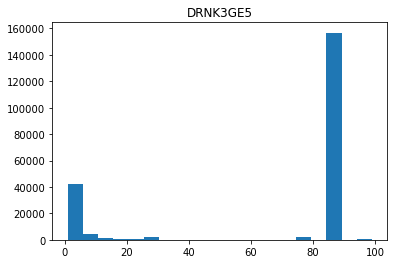

(array([1.76348e+05, 2.14520e+04, 3.96600e+03, 9.58000e+02, 2.88000e+02,
        2.29000e+02, 2.70000e+01, 4.30000e+01, 1.60000e+01, 1.20000e+01,
        2.00000e+01, 2.00000e+00, 1.30000e+01, 3.00000e+00, 4.00000e+00,
        5.52000e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.11600e+03]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'MAXDRNKS')

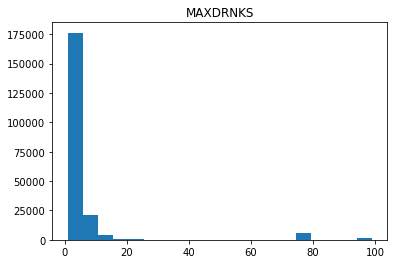

(array([365929.,  29248.,  24629.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  21650.]),
 array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360., 405., 450.,
        495., 540., 585., 630., 675., 720., 765., 810., 855., 900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'DROCDY3_')

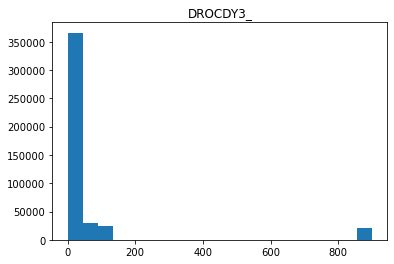

(array([365239.,      0.,  50606.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  25611.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_RFBING5')

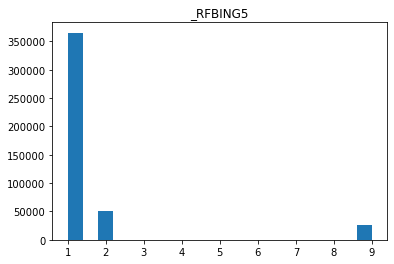

(array([4.14543e+05, 9.02000e+02, 1.50000e+02, 3.20000e+01, 6.00000e+01,
        8.00000e+00, 4.00000e+00, 5.00000e+00, 1.20000e+01, 2.00000e+00,
        5.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.57330e+04]),
 array([    0.,  4995.,  9990., 14985., 19980., 24975., 29970., 34965.,
        39960., 44955., 49950., 54945., 59940., 64935., 69930., 74925.,
        79920., 84915., 89910., 94905., 99900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_DRNKWEK')

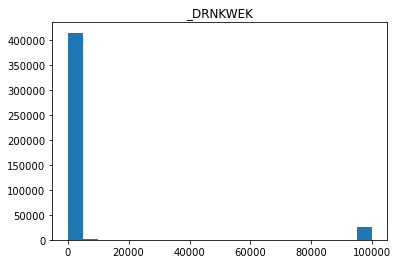

(array([393658.,      0.,  22065.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  25733.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_RFDRHV5')

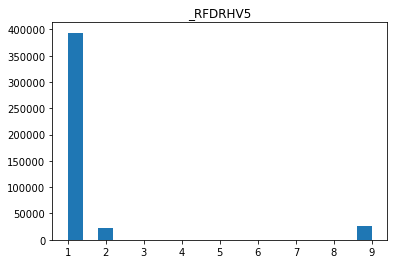

(array([211346.,      0., 208460.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   3095.,      0.,      0.,      0.,  18555.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'DRNKANY5')

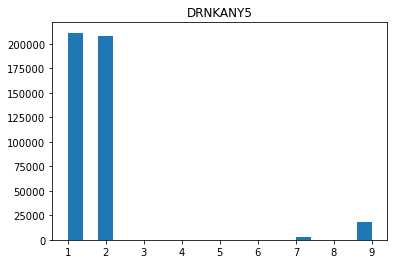

(array([ 68148.,  19424.,  12896.,   6428.,   2738.,  23338.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   5204.,      0., 301076.,      0.,   2204.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'MENTHLTH')

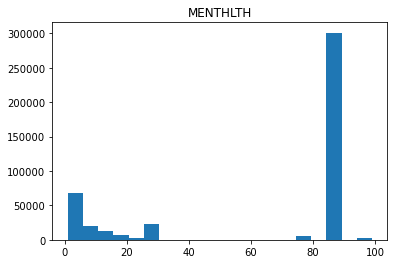

(array([7.21350e+04, 2.00000e+00, 6.36030e+04, 2.00000e+00, 9.48840e+04,
        6.29900e+03, 5.90000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.65937e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        8.22900e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.30800e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FRUITJU1')

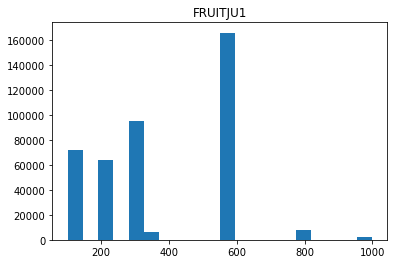

(array([1.83669e+05, 7.00000e+00, 9.47640e+04, 3.00000e+00, 9.24780e+04,
        1.74700e+04, 2.79000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.62040e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.13900e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.29300e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FRUIT1')

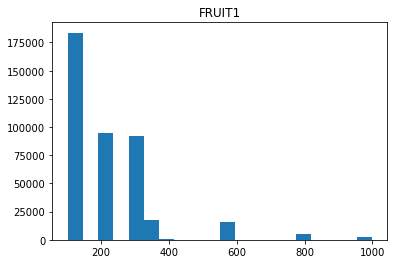

(array([2.38220e+04, 1.00000e+00, 1.31225e+05, 1.00000e+00, 1.75440e+05,
        2.35600e+03, 2.70000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        6.86370e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.38600e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.18600e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FVBEANS')

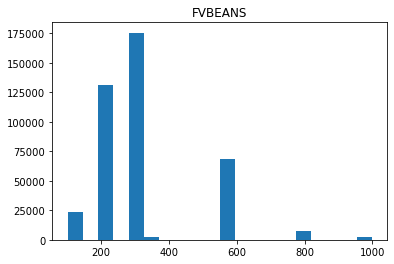

(array([7.86160e+04, 2.00000e+00, 1.46913e+05, 5.00000e+00, 1.35568e+05,
        1.08850e+04, 1.00000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.14180e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.42700e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.21100e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FVGREEN')

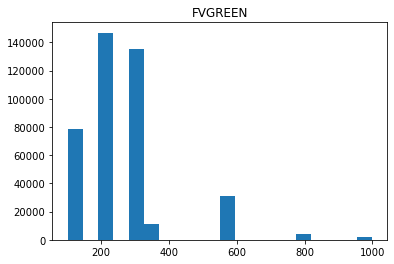

(array([2.81030e+04, 0.00000e+00, 1.40878e+05, 2.00000e+00, 1.71036e+05,
        2.75300e+03, 1.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.94080e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.98900e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.15400e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FVORANG')

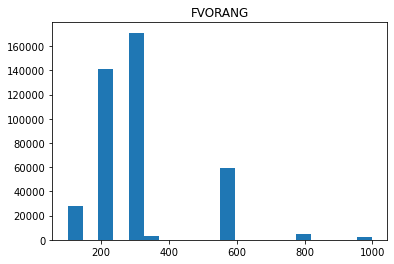

(array([1.32144e+05, 2.00000e+00, 1.25760e+05, 7.00000e+00, 1.08517e+05,
        2.58800e+04, 2.31000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.45200e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.79500e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.53000e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'VEGETAB1')

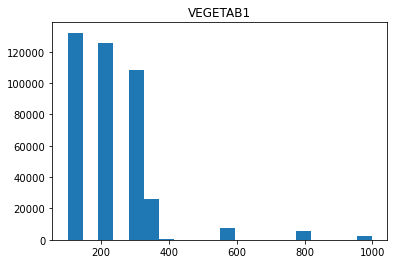

(array([4.02093e+05, 7.46000e+02, 4.80000e+01, 7.00000e+00, 1.30000e+01,
        2.00000e+00, 7.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([   0.,  495.,  990., 1485., 1980., 2475., 2970., 3465., 3960.,
        4455., 4950., 5445., 5940., 6435., 6930., 7425., 7920., 8415.,
        8910., 9405., 9900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FTJUDA1_')

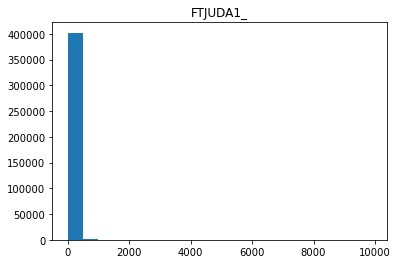

(array([4.01826e+05, 2.90700e+03, 6.90000e+01, 1.50000e+01, 1.50000e+01,
        6.00000e+00, 1.50000e+01, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.20000e+01]),
 array([   0.,  495.,  990., 1485., 1980., 2475., 2970., 3465., 3960.,
        4455., 4950., 5445., 5940., 6435., 6930., 7425., 7920., 8415.,
        8910., 9405., 9900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FRUTDA1_')

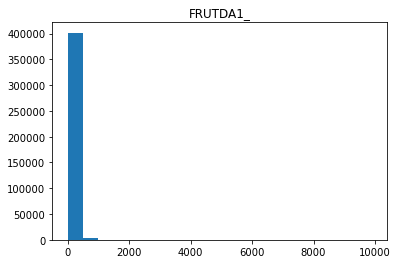

(array([4.01233e+05, 2.53000e+02, 9.00000e+00, 7.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   0.,  495.,  990., 1485., 1980., 2475., 2970., 3465., 3960.,
        4455., 4950., 5445., 5940., 6435., 6930., 7425., 7920., 8415.,
        8910., 9405., 9900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'BEANDAY_')

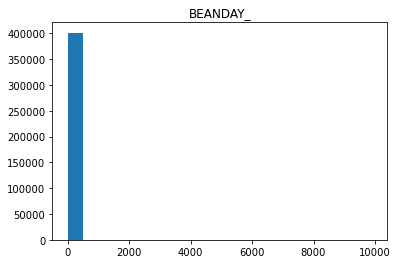

(array([4.02749e+05, 7.19000e+02, 1.60000e+01, 5.00000e+00, 5.00000e+00,
        2.00000e+00, 7.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   0.,  495.,  990., 1485., 1980., 2475., 2970., 3465., 3960.,
        4455., 4950., 5445., 5940., 6435., 6930., 7425., 7920., 8415.,
        8910., 9405., 9900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'GRENDAY_')

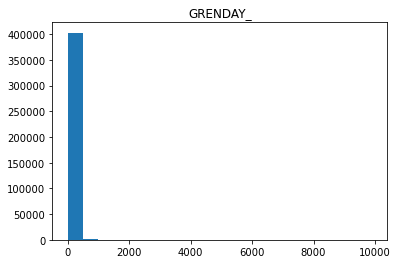

(array([4.01934e+05, 2.38000e+02, 1.00000e+01, 6.00000e+00, 1.00000e+00,
        3.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   0.,  495.,  990., 1485., 1980., 2475., 2970., 3465., 3960.,
        4455., 4950., 5445., 5940., 6435., 6930., 7425., 7920., 8415.,
        8910., 9405., 9900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'ORNGDAY_')

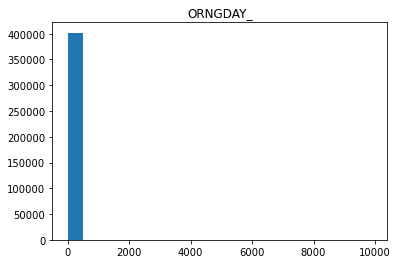

(array([3.98918e+05, 1.01200e+03, 2.30000e+01, 1.10000e+01, 7.00000e+00,
        6.00000e+00, 8.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.00000e+00]),
 array([   0.,  495.,  990., 1485., 1980., 2475., 2970., 3465., 3960.,
        4455., 4950., 5445., 5940., 6435., 6930., 7425., 7920., 8415.,
        8910., 9405., 9900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'VEGEDA1_')

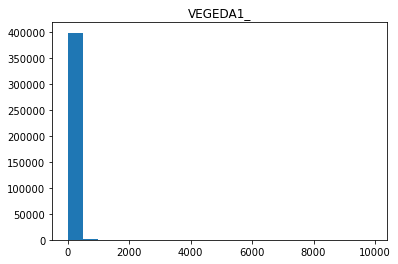

(array([3.96887e+05, 7.39000e+02, 6.20000e+01, 9.00000e+00, 2.10000e+01,
        3.00000e+00, 4.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 1.20000e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.,   750.,  1500.,  2250.,  3000.,  3750.,  4500.,  5250.,
         6000.,  6750.,  7500.,  8250.,  9000.,  9750., 10500., 11250.,
        12000., 12750., 13500., 14250., 15000.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_FRUTSUM')

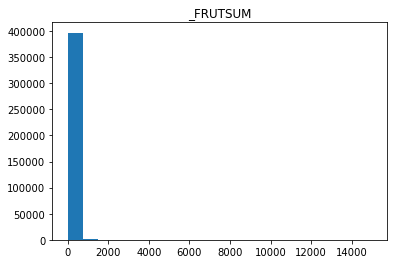

(array([3.89419e+05, 8.58000e+02, 3.10000e+01, 1.10000e+01, 2.00000e+00,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        7.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([    0.  ,   996.45,  1992.9 ,  2989.35,  3985.8 ,  4982.25,
         5978.7 ,  6975.15,  7971.6 ,  8968.05,  9964.5 , 10960.95,
        11957.4 , 12953.85, 13950.3 , 14946.75, 15943.2 , 16939.65,
        17936.1 , 18932.55, 19929.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_VEGESUM')

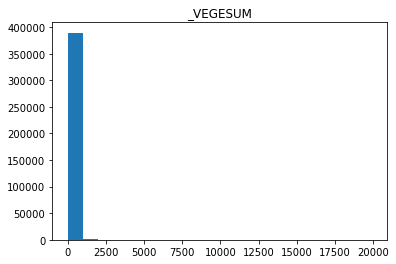

(array([247817.,      0., 149928.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  43711.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_FRTLT1')

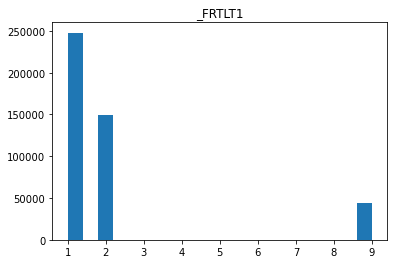

(array([309561.,      0.,  80778.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  51117.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_VEGLT1')

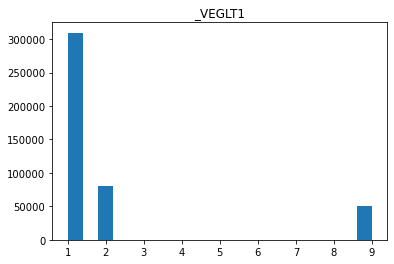

(array([178188.,      0.,   3271.,      0.,      0., 254318.,      0.,
          4312.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,    862.,      0.,      0.,      0.,    504.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'BPHIGH4')

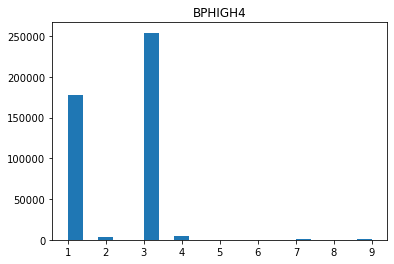

(array([1.49034e+05, 0.00000e+00, 2.88330e+04, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.58000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.30000e+01]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'BPMEDS')

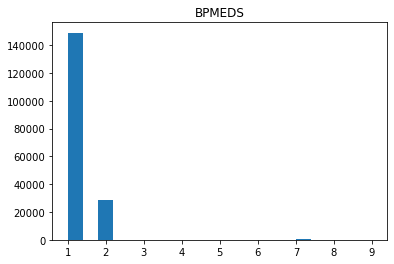

(array([3.82302e+05, 0.00000e+00, 4.96730e+04, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        9.27900e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.02000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'BLOODCHO')

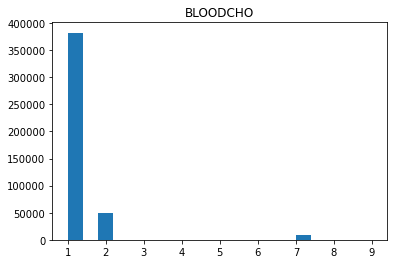

(array([2.93355e+05, 0.00000e+00, 4.35960e+04, 0.00000e+00, 0.00000e+00,
        2.59720e+04, 0.00000e+00, 1.35230e+04, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.58400e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.72000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'CHOLCHK')

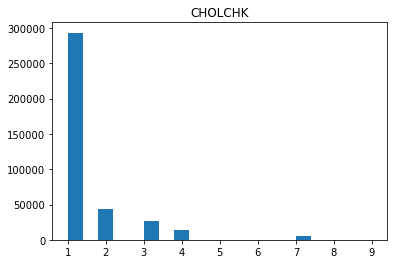

(array([159970.,      0., 218771.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   3037.,      0.,      0.,      0.,    524.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'TOLDHI2')

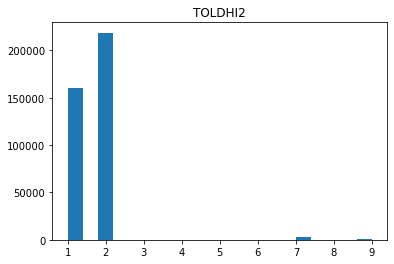

(array([2.54720e+04, 0.00000e+00, 4.13755e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.03800e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.91000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'CVDINFR4')

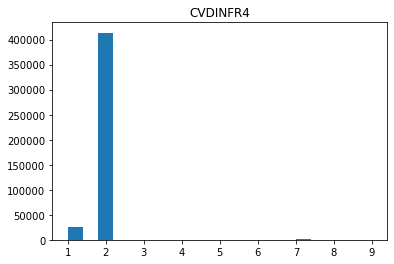

(array([2.52900e+04, 0.00000e+00, 4.12349e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.59100e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.25000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'CVDCRHD4')

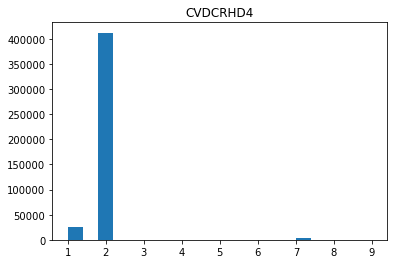

(array([1.82690e+04, 0.00000e+00, 4.21897e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.14600e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.44000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'CVDSTRK3')

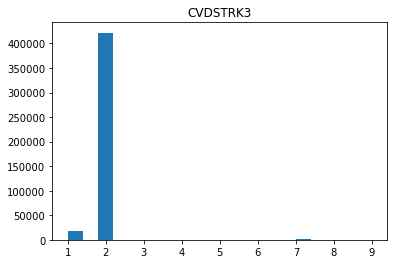

(array([ 38633.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0., 398881.]),
 array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
        1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_MICHD')

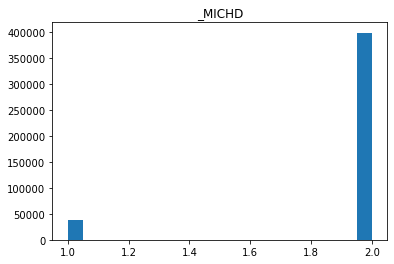

(array([4.1776e+04, 0.0000e+00, 3.9842e+05, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1040e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5500e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'CHCSCNCR')

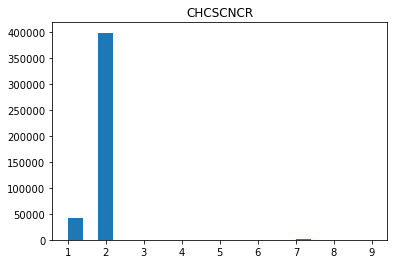

(array([5.72560e+04, 0.00000e+00, 3.60800e+03, 0.00000e+00, 0.00000e+00,
        3.72104e+05, 0.00000e+00, 7.69000e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.98000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.93000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'DIABETE3')

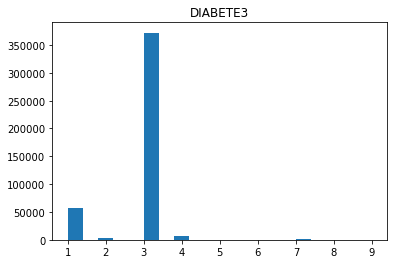

(array([184299.,      0., 239608.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   1832.,      0.,      0.,      0.,   1462.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'SMOKE100')

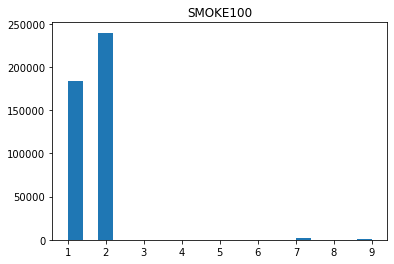

(array([4.35830e+04, 0.00000e+00, 1.79980e+04, 0.00000e+00, 0.00000e+00,
        1.22277e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        8.60000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.49000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'SMOKDAY2')

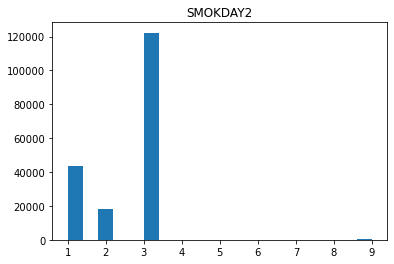

(array([7.52200e+03, 0.00000e+00, 6.05500e+03, 0.00000e+00, 0.00000e+00,
        4.11021e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.43000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.82500e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'USENOW3')

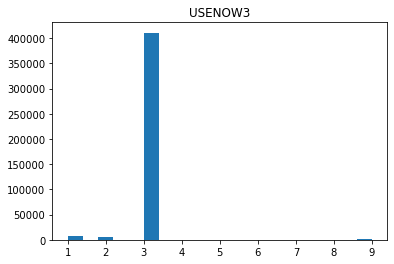

(array([ 43583.,      0.,  17998.,      0.,      0., 122277.,      0.,
        239608.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  17990.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_SMOKER3')

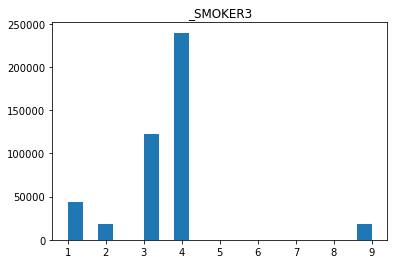

(array([361885.,      0.,  61581.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  17990.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_RFSMOK3')

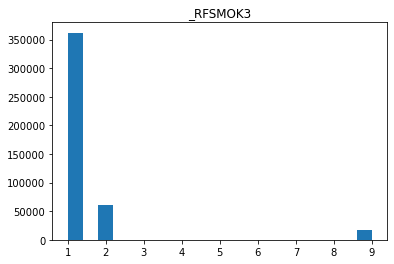

(array([ 76890.,  21149.,  14022.,   6117.,   3622.,  35770.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   7664.,      0., 274143.,      0.,   2078.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'PHYSHLTH')

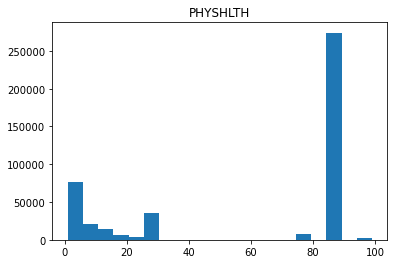

In [6]:
# Plot histograms for each feature
for feature in data:
    plt.hist(df[feature], bins=20)
    plt.title(feature)
    plt.show()

In [7]:
features = ['MENTHLTH', 'EXERANY2', 'USENOW3']

In [8]:
df_subset = data[features]

In [9]:
df_subset_std = (df_subset - df_subset.mean()) / df_subset.std()

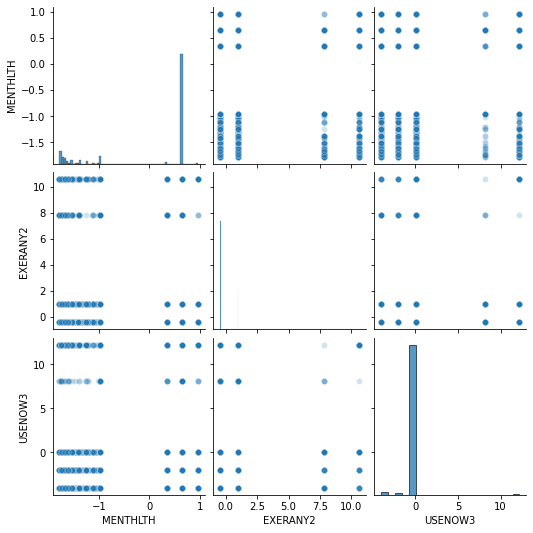

In [10]:
import seaborn as sns
sns.pairplot(df_subset_std, diag_kind='hist', plot_kws={'alpha': 0.2})

In [11]:
data.isnull().mean() * 100

Patient_ID     0.000000
SEX            0.000000
MARITAL        0.000000
EDUCA          0.000000
WEIGHT2        1.203970
                ...    
SMOKDAY2      58.276023
USENOW3        3.372930
_SMOKER3       0.000000
_RFSMOK3       0.000000
PHYSHLTH       0.000227
Length: 61, dtype: float64

In [12]:
data['WEIGHT2'].isnull().sum()

5315

In [13]:
most_frequent_WEIGHT2 = data['WEIGHT2'].mode()[0]
data['WEIGHT2'].fillna(most_frequent_WEIGHT2, inplace=True)

In [14]:
data['WEIGHT2'].isnull().sum()

0

In [15]:
data['HEIGHT3'].isnull().sum()
most_frequent_HEIGHT3 = data['HEIGHT3'].mode()[0]
data['HEIGHT3'].fillna(most_frequent_HEIGHT3, inplace=True)
data['HEIGHT3'].isnull().sum()

5911

0

In [16]:
data['_BMI5'].isnull().sum()
mean_BMI5 = data['_BMI5'].mean()
data['_BMI5'].fillna(mean_BMI5, inplace=True)
data['_BMI5'].isnull().sum()

36398

0

In [17]:
data['GENHLTH'].unique()

array([ 5.,  3.,  4.,  2.,  1.,  7.,  9., nan])

In [18]:
data['GENHLTH'].fillna(5, inplace=True)
data['GENHLTH']=np.where(data['GENHLTH'] == 7, 5, data['GENHLTH'])
data['GENHLTH']=np.where(data['GENHLTH'] == 9, 5, data['GENHLTH'])
data['GENHLTH'].unique()

array([5., 3., 4., 2., 1.])

In [19]:
data['EXERANY2'].unique()

array([ 2.,  1., nan,  9.,  7.])

9 = Other

In [20]:
data['EXERANY2'].fillna(9, inplace=True)
data['EXERANY2']=np.where(data['EXERANY2'] == 7, 9, data['EXERANY2'])
data['EXERANY2'].unique()

array([2., 1., 9.])

In [21]:
mean_EXRACT11 = data['EXRACT11'].mean()
data['EXRACT11'].fillna(mean_EXRACT11, inplace=True)
data['EXRACT11']=np.where(data['EXRACT11'] == 98, 99, data['EXRACT11'])
data['EXRACT11']=np.where(data['EXRACT11'] == 77, 99, data['EXRACT11'])
data['EXRACT11'].isnull().sum()

0

In [22]:
data.isnull().mean() * 100

Patient_ID     0.000000
SEX            0.000000
MARITAL        0.000000
EDUCA          0.000000
WEIGHT2        0.000000
                ...    
SMOKDAY2      58.276023
USENOW3        3.372930
_SMOKER3       0.000000
_RFSMOK3       0.000000
PHYSHLTH       0.000227
Length: 61, dtype: float64

In [23]:
data['EXEROFT1'].isnull().sum()
most_frequent_EXEROFT1 = data['EXEROFT1'].mode()[0]
data['EXEROFT1'].fillna(most_frequent_EXEROFT1, inplace=True)
data['EXEROFT1']=np.where(data['EXEROFT1'] == 777, 999, data['EXEROFT1'])
data['EXEROFT1'].isnull().sum()

147431

0

In [24]:
data['EXERHMM1'].isnull().sum()
most_frequent_EXERHMM1 = data['EXERHMM1'].mode()[0]
data['EXERHMM1'].fillna(most_frequent_EXERHMM1, inplace=True)
data['EXERHMM1']=np.where(data['EXERHMM1'] == 777, 999, data['EXERHMM1'])
data['EXERHMM1'].isnull().sum()

147791

0

In [25]:
most_frequent_EXRACT21 = data['EXRACT21'].mode()[0]
data['EXRACT21'].fillna(most_frequent_EXRACT21, inplace=True)
data['EXRACT21']=np.where(data['EXRACT21'] == 98, 99, data['EXRACT21'])
data['EXRACT21']=np.where(data['EXRACT21'] == 77, 99, data['EXRACT21'])
data['EXRACT21'].isnull().sum()

0

In [26]:
data['EXEROFT2'].isnull().sum()
most_frequent_EXEROFT2 = data['EXEROFT2'].mode()[0]
data['EXEROFT2'].fillna(most_frequent_EXEROFT2, inplace=True)
data['EXEROFT2']=np.where(data['EXEROFT2'] == 777, 999, data['EXEROFT2'])
data['EXEROFT2'].isnull().sum()

244540

0

In [27]:
data['EXERHMM2'].isnull().sum()
most_frequent_EXERHMM2 = data['EXERHMM2'].mode()[0]
data['EXERHMM2'].fillna(most_frequent_EXERHMM2, inplace=True)
data['EXERHMM2']=np.where(data['EXERHMM2'] == 777, 999, data['EXERHMM2'])
data['EXERHMM2'].isnull().sum()

244722

0

In [28]:
data.isnull().mean() * 100

Patient_ID     0.000000
SEX            0.000000
MARITAL        0.000000
EDUCA          0.000000
WEIGHT2        0.000000
                ...    
SMOKDAY2      58.276023
USENOW3        3.372930
_SMOKER3       0.000000
_RFSMOK3       0.000000
PHYSHLTH       0.000227
Length: 61, dtype: float64

In [29]:
data['STRENGTH'].isnull().sum()
most_frequent_STRENGTH = data['STRENGTH'].mode()[0]
data['STRENGTH'].fillna(most_frequent_STRENGTH, inplace=True)
data['STRENGTH']=np.where(data['STRENGTH'] == 777, 999, data['STRENGTH'])
data['STRENGTH'].isnull().sum()

38720

0

In [30]:
data['ALCDAY5'].isnull().sum()
most_frequent_ALCDAY5 = data['ALCDAY5'].mode()[0]
data['ALCDAY5'].fillna(most_frequent_ALCDAY5, inplace=True)
data['ALCDAY5']=np.where(data['ALCDAY5'] == 777, 999, data['ALCDAY5'])
data['ALCDAY5'].isnull().sum()

15931

0

In [31]:
data['AVEDRNK2'].isnull().sum()
most_frequent_AVEDRNK2 = data['AVEDRNK2'].mode()[0]
data['AVEDRNK2'].fillna(most_frequent_AVEDRNK2, inplace=True)
data['AVEDRNK2']=np.where(data['AVEDRNK2'] == 77, 99, data['AVEDRNK2'])
data['AVEDRNK2'].isnull().sum()

230618

0

In [32]:
data['DRNK3GE5'].isnull().sum()
most_frequent_DRNK3GE5 = data['DRNK3GE5'].mode()[0]
data['DRNK3GE5'].fillna(most_frequent_DRNK3GE5, inplace=True)
data['DRNK3GE5']=np.where(data['DRNK3GE5'] == 77, 99, data['DRNK3GE5'])
data['DRNK3GE5']=np.where(data['DRNK3GE5'] == 88, 99, data['DRNK3GE5'])
data['DRNK3GE5'].isnull().sum()

231036

0

In [33]:
data['MAXDRNKS'].isnull().sum()
most_frequent_MAXDRNKS = data['MAXDRNKS'].mode()[0]
data['MAXDRNKS'].fillna(most_frequent_MAXDRNKS, inplace=True)
data['MAXDRNKS']=np.where(data['MAXDRNKS'] == 77, 99, data['MAXDRNKS'])
data['MAXDRNKS'].isnull().sum()

231439

0

In [34]:
data['FRUITJU1'].isnull().sum()
most_frequent_FRUITJU1 = data['FRUITJU1'].mode()[0]
data['FRUITJU1'].fillna(most_frequent_FRUITJU1, inplace=True)
data['FRUITJU1']=np.where(data['FRUITJU1'] == 777, 355, data['FRUITJU1'])
data['FRUITJU1']=np.where(data['FRUITJU1'] == 999, 355, data['FRUITJU1'])
data['FRUITJU1'].isnull().sum()

27998

0

In [35]:
data['FRUIT1'].isnull().sum()
most_frequent_FRUIT1 = data['FRUIT1'].mode()[0]
data['FRUIT1'].fillna(most_frequent_FRUIT1, inplace=True)
data['FRUIT1']=np.where(data['FRUIT1'] == 777, 355, data['FRUIT1'])
data['FRUIT1']=np.where(data['FRUIT1'] == 999, 355, data['FRUIT1'])
data['FRUIT1'].isnull().sum()

29150

0

In [36]:
data['FVBEANS'].isnull().sum()
most_frequent_FVBEANS = data['FVBEANS'].mode()[0]
data['FVBEANS'].fillna(most_frequent_FVBEANS, inplace=True)
data['FVBEANS']=np.where(data['FVBEANS'] == 777, 355, data['FVBEANS'])
data['FVBEANS']=np.where(data['FVBEANS'] == 999, 355, data['FVBEANS'])
data['FVBEANS'].isnull().sum()

30375

0

In [37]:
data['FVGREEN'].isnull().sum()
most_frequent_FVGREEN = data['FVGREEN'].mode()[0]
data['FVGREEN'].fillna(most_frequent_FVGREEN, inplace=True)
data['FVGREEN']=np.where(data['FVGREEN'] == 777, 355, data['FVGREEN'])
data['FVGREEN']=np.where(data['FVGREEN'] == 999, 355, data['FVGREEN'])
data['FVGREEN'].isnull().sum()

31311

0

In [38]:
data['FVORANG'].isnull().sum()
most_frequent_FVORANG = data['FVORANG'].mode()[0]
data['FVORANG'].fillna(most_frequent_FVORANG, inplace=True)
data['FVORANG']=np.where(data['FVORANG'] == 777, 355, data['FVORANG'])
data['FVORANG']=np.where(data['FVORANG'] == 999, 355, data['FVORANG'])
data['FVORANG'].isnull().sum()

32115

0

In [39]:
data['VEGETAB1'].isnull().sum()
most_frequent_VEGETAB1 = data['VEGETAB1'].mode()[0]
data['VEGETAB1'].fillna(most_frequent_VEGETAB1, inplace=True)
data['VEGETAB1']=np.where(data['VEGETAB1'] == 777, 355, data['VEGETAB1'])
data['VEGETAB1']=np.where(data['VEGETAB1'] == 999, 355, data['VEGETAB1'])
data['VEGETAB1'].isnull().sum()

33138

0

In [40]:
data['FTJUDA1_'].isnull().sum()
most_frequent = data['FTJUDA1_'].mode()[0]
data['FTJUDA1_'].fillna(most_frequent, inplace=True)
data['FTJUDA1_'].isnull().sum()

38535

0

In [41]:
data['FRUTDA1_'].isnull().sum()
most_frequent = data['FRUTDA1_'].mode()[0]
data['FRUTDA1_'].fillna(most_frequent, inplace=True)
data['FRUTDA1_'].isnull().sum()

36582

0

In [42]:
data['BEANDAY_'].isnull().sum()
most_frequent = data['BEANDAY_'].mode()[0]
data['BEANDAY_'].fillna(most_frequent, inplace=True)
data['BEANDAY_'].isnull().sum()

39947

0

In [43]:
data['GRENDAY_'].isnull().sum()
most_frequent = data['GRENDAY_'].mode()[0]
data['GRENDAY_'].fillna(most_frequent, inplace=True)
data['GRENDAY_'].isnull().sum()

37949

0

In [44]:
data['ORNGDAY_'].isnull().sum()
most_frequent = data['ORNGDAY_'].mode()[0]
data['ORNGDAY_'].fillna(most_frequent, inplace=True)
data['ORNGDAY_'].isnull().sum()

39258

0

In [45]:
data['VEGEDA1_'].isnull().sum()
most_frequent = data['VEGEDA1_'].mode()[0]
data['VEGEDA1_'].fillna(most_frequent, inplace=True)
data['VEGEDA1_'].isnull().sum()

41463

0

In [46]:
data['_FRUTSUM'].isnull().sum()
most_frequent = data['_FRUTSUM'].mode()[0]
data['_FRUTSUM'].fillna(most_frequent, inplace=True)
data['_FRUTSUM'].isnull().sum()

43711

0

In [47]:
data['_VEGESUM'].isnull().sum()
most_frequent = data['_VEGESUM'].mode()[0]
data['_VEGESUM'].fillna(most_frequent, inplace=True)
data['_VEGESUM'].isnull().sum()

51117

0

In [48]:
data['BPHIGH4'].isnull().sum()
most_frequent = data['BPHIGH4'].mode()[0]
data['BPHIGH4'].fillna(most_frequent, inplace=True)
data['BPHIGH4']=np.where(data['BPHIGH4'] == 7, 9, data['BPHIGH4'])
data['BPHIGH4'].isnull().sum()

1

0

In [49]:
data['BPMEDS'].isnull().sum()
most_frequent = data['BPMEDS'].mode()[0]
data['BPMEDS'].fillna(most_frequent, inplace=True)
data['BPMEDS']=np.where(data['BPMEDS'] == 7, 9, data['BPMEDS'])
data['BPMEDS'].isnull().sum()

263268

0

In [50]:
data['CHOLCHK'].isnull().sum()
most_frequent = data['CHOLCHK'].mode()[0]
data['CHOLCHK'].fillna(most_frequent, inplace=True)
data['CHOLCHK']=np.where(data['CHOLCHK'] == 7, 9, data['CHOLCHK'])
data['CHOLCHK'].isnull().sum()

59154

0

In [51]:
#data['TOLDHI2'].unique()
data['TOLDHI2'].isnull().sum()
most_frequent = data['TOLDHI2'].mode()[0]
data['TOLDHI2'].fillna(most_frequent, inplace=True)
data['TOLDHI2']=np.where(data['TOLDHI2'] == 7, 9, data['TOLDHI2'])
data['TOLDHI2'].isnull().sum()

59154

0

In [52]:
#data['CVDCRHD4'].unique()
data['CVDCRHD4'].isnull().sum()
most_frequent = data['CVDCRHD4'].mode()[0]
data['CVDCRHD4'].fillna(most_frequent, inplace=True)
data['CVDCRHD4']=np.where(data['CVDCRHD4'] == 7, 9, data['CVDCRHD4'])
data['CVDCRHD4'].isnull().sum()

1

0

In [53]:
data['_MICHD'].isnull().sum()
data['_MICHD'].unique()
most_frequent = data['_MICHD'].mode()[0]
data['_MICHD'].fillna(most_frequent, inplace=True)
#data['_MICHD']=np.where(data['_MICHD'] == 7, 9, data['_MICHD'])
data['_MICHD'].isnull().sum()

3942

array([ 2., nan,  1.])

0

In [54]:
#data['CHCSCNCR'].unique()
data['CHCSCNCR'].isnull().sum()
most_frequent = data['CHCSCNCR'].mode()[0]
data['CHCSCNCR'].fillna(most_frequent, inplace=True)
data['CHCSCNCR']=np.where(data['CHCSCNCR'] == 7, 9, data['CHCSCNCR'])
data['CHCSCNCR'].isnull().sum()

1

0

In [55]:
#data['DIABETE3'].unique()
data['DIABETE3'].isnull().sum()
most_frequent = data['DIABETE3'].mode()[0]
data['DIABETE3'].fillna(most_frequent, inplace=True)
data['DIABETE3']=np.where(data['DIABETE3'] == 7, 9, data['DIABETE3'])
data['DIABETE3'].isnull().sum()

7

0

In [56]:
data['SMOKE100'].isnull().sum()
most_frequent = data['SMOKE100'].mode()[0]
data['SMOKE100'].fillna(most_frequent, inplace=True)
data['SMOKE100']=np.where(data['SMOKE100'] == 7, 9, data['SMOKE100'])
data['SMOKE100'].isnull().sum()

14255

0

In [57]:
data['SMOKDAY2'].isnull().sum()
most_frequent = data['SMOKDAY2'].mode()[0]
data['SMOKDAY2'].fillna(most_frequent, inplace=True)
data['SMOKDAY2']=np.where(data['SMOKDAY2'] == 7, 9, data['SMOKDAY2'])
data['SMOKDAY2'].isnull().sum()

257263

0

In [58]:
data['USENOW3'].isnull().sum()
most_frequent = data['USENOW3'].mode()[0]
data['USENOW3'].fillna(most_frequent, inplace=True)
data['USENOW3']=np.where(data['USENOW3'] == 7, 9, data['USENOW3'])
data['USENOW3'].isnull().sum()

14890

0

In [59]:
data['PHYSHLTH'].isnull().sum()
most_frequent = data['PHYSHLTH'].mode()[0]
data['PHYSHLTH'].fillna(most_frequent, inplace=True)
data['PHYSHLTH']=np.where(data['PHYSHLTH'] == 77, 99, data['PHYSHLTH'])
data['PHYSHLTH'].isnull().sum()

1

0

In [60]:
data.isnull().sum()

Patient_ID    0
SEX           0
MARITAL       0
EDUCA         0
WEIGHT2       0
             ..
SMOKDAY2      0
USENOW3       0
_SMOKER3      0
_RFSMOK3      0
PHYSHLTH      0
Length: 61, dtype: int64

In [61]:
percentages = []
for col in data.columns:
    counts = data[col].value_counts()
    percentages.append((col, counts / len(data[col]) * 100))
    
for feature, percentage in percentages:
    print(f"{feature}:")
    print(percentage)

Patient_ID:
2049      0.000227
258859    0.000227
254761    0.000227
256808    0.000227
234279    0.000227
            ...   
40121     0.000227
38072     0.000227
60599     0.000227
58550     0.000227
2047      0.000227
Name: Patient_ID, Length: 441456, dtype: float64
SEX:
2    57.654217
1    42.345783
Name: SEX, dtype: float64
MARITAL:
1    52.827462
5    15.328368
2    13.456834
3    12.794254
6     2.860308
4     2.031460
9     0.701316
Name: MARITAL, dtype: float64
EDUCA:
6    36.613162
4    27.913767
5    27.302381
3     5.088389
2     2.534114
9     0.410233
1     0.137953
Name: EDUCA, dtype: float64
WEIGHT2:
200.0     6.110235
180.0     4.650294
150.0     4.606122
160.0     4.289669
9999.0    4.055670
            ...   
69.0      0.000227
453.0     0.000227
9034.0    0.000227
413.0     0.000227
9156.0    0.000227
Name: WEIGHT2, Length: 573, dtype: float64
HEIGHT3:
504.0     10.300234
506.0      8.908023
505.0      7.910641
507.0      7.787639
503.0      7.189618
            ...

In [62]:
not_needed = data[['DRNK3GE5','FRUITJU1','FTJUDA1_','STRENGTH']]
data.drop(not_needed, axis = 1, inplace =True)

In [63]:
#columns that has value 9 and is important
columns_to_exclude = ['Patient_ID', 'WEIGHT2','HEIGHT3','_BMI5','_AGEG5YR','AVEDRNK2','DRNK3GE5','MAXDRNKS',]
for col in data.columns:
    if col not in columns_to_exclude:
        most_common_value = data[col].mode().iloc[0]
        data[col] = data[col].replace(9.0, most_common_value)

In [64]:
for col in data.columns:
    most_common_value = data[col].mode().iloc[0]
    data[col] = data[col].replace(99.0, most_common_value)

In [65]:
for col in data.columns:
    most_common_value = data[col].mode().iloc[0]
    data[col] = data[col].replace(999.0, most_common_value)

In [66]:
for col in data.columns:
    most_common_value = data[col].mode().iloc[0]
    data[col] = data[col].replace(9999.0, most_common_value)

In [67]:
for col in data.columns:
    data[col] = data[col].replace(888.0, 0)
    data[col] = data[col].replace(88.0, 0)

In [68]:
# Iterate over each column of the DataFrame and calculate the value percentages
percentages = []
for col in data.columns:
    counts = data[col].value_counts()
    percentages.append((col, counts / len(data[col]) * 100))

# Print the resulting list of percentages for each feature
for feature, percentage in percentages:
    print(f"{feature}:")
    print(percentage)

Patient_ID:
1         0.000906
0         0.000453
267223    0.000227
254761    0.000227
234279    0.000227
            ...   
33978     0.000227
40121     0.000227
38072     0.000227
60599     0.000227
2047      0.000227
Name: Patient_ID, Length: 441452, dtype: float64
SEX:
2    57.654217
1    42.345783
Name: SEX, dtype: float64
MARITAL:
1    53.528777
5    15.328368
2    13.456834
3    12.794254
6     2.860308
4     2.031460
Name: MARITAL, dtype: float64
EDUCA:
6    37.023395
4    27.913767
5    27.302381
3     5.088389
2     2.534114
1     0.137953
Name: EDUCA, dtype: float64
WEIGHT2:
200.0     10.190370
180.0      4.650294
150.0      4.606122
160.0      4.289669
170.0      3.889855
            ...    
9130.0     0.000227
9205.0     0.000227
454.0      0.000227
9129.0     0.000227
9156.0     0.000227
Name: WEIGHT2, Length: 570, dtype: float64
HEIGHT3:
504.0     11.598664
506.0      8.908023
505.0      7.910641
507.0      7.787639
503.0      7.189618
            ...    
9060.0     0.0

In [69]:
features = ['MENTHLTH', 'EXERANY2', 'USENOW3']

In [70]:
df_subset = df[features]

In [71]:
df_subset_std = (df_subset - df_subset.mean()) / df_subset.std()

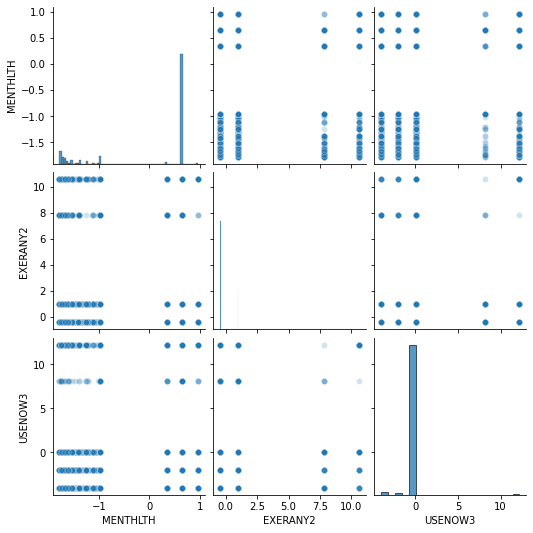

In [72]:
import seaborn as sns
sns.pairplot(df_subset_std, diag_kind='hist', plot_kws={'alpha': 0.2})

(array([22073., 22073., 22073., 22072., 22073., 22073., 22073., 22072.,
        22073., 22073., 22073., 22072., 22073., 22073., 22073., 22072.,
        22073., 22073., 22073., 22073.]),
 array([1.0000000e+00, 2.2073750e+04, 4.4146500e+04, 6.6219250e+04,
        8.8292000e+04, 1.1036475e+05, 1.3243750e+05, 1.5451025e+05,
        1.7658300e+05, 1.9865575e+05, 2.2072850e+05, 2.4280125e+05,
        2.6487400e+05, 2.8694675e+05, 3.0901950e+05, 3.3109225e+05,
        3.5316500e+05, 3.7523775e+05, 3.9731050e+05, 4.1938325e+05,
        4.4145600e+05]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Patient_ID')

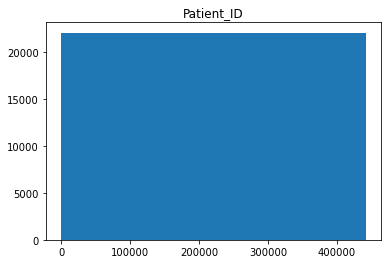

(array([186938.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0., 254518.]),
 array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
        1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'SEX')

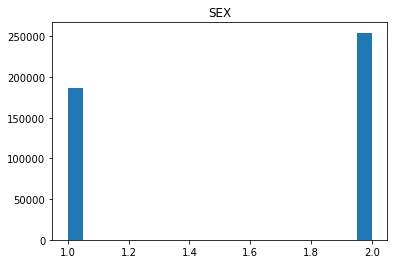

(array([233210.,      0.,  59406.,      0.,      0.,  56481.,      0.,
          8968.,      0.,      0.,  67668.,      0.,  12627.,      0.,
             0.,      0.,      0.,      0.,      0.,   3096.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'MARITAL')

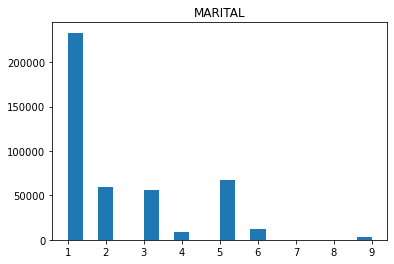

(array([   609.,      0.,  11187.,      0.,      0.,  22463.,      0.,
        123227.,      0.,      0., 120528.,      0., 161631.,      0.,
             0.,      0.,      0.,      0.,      0.,   1811.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EDUCA')

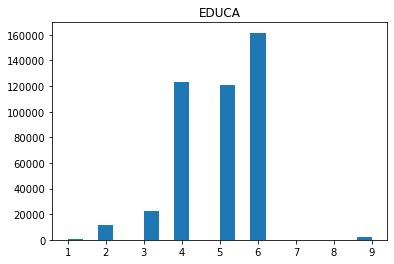

(array([4.09454e+05, 2.27000e+02, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.69400e+03, 0.00000e+00, 0.00000e+00, 8.61000e+02, 1.79040e+04]),
 array([  50.  ,  547.45, 1044.9 , 1542.35, 2039.8 , 2537.25, 3034.7 ,
        3532.15, 4029.6 , 4527.05, 5024.5 , 5521.95, 6019.4 , 6516.85,
        7014.3 , 7511.75, 8009.2 , 8506.65, 9004.1 , 9501.55, 9999.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'WEIGHT2')

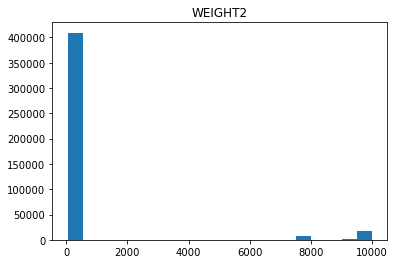

(array([4.24161e+05, 4.10000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.77600e+03, 0.00000e+00, 1.00000e+00, 1.83400e+03, 5.73200e+03]),
 array([ 200.  ,  689.95, 1179.9 , 1669.85, 2159.8 , 2649.75, 3139.7 ,
        3629.65, 4119.6 , 4609.55, 5099.5 , 5589.45, 6079.4 , 6569.35,
        7059.3 , 7549.25, 8039.2 , 8529.15, 9019.1 , 9509.05, 9999.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'HEIGHT3')

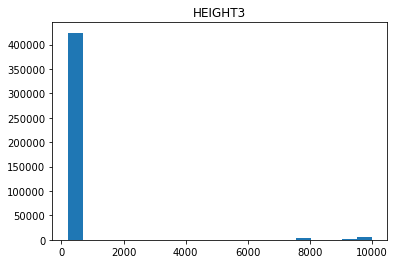

(array([ 38048.,      0.,  59174.,      0.,      0.,  39235.,      0.,
         52052.,      0.,      0., 173442.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  79505.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_INCOMG')

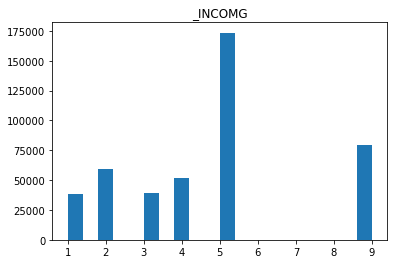

(array([1.12100e+03, 3.08340e+04, 1.18153e+05, 1.26425e+05, 7.20250e+04,
        3.15610e+04, 1.33940e+04, 5.95500e+03, 2.54800e+03, 1.12400e+03,
        5.04000e+02, 2.62000e+02, 1.02000e+02, 2.19000e+02, 1.96000e+02,
        2.93000e+02, 1.80000e+02, 5.70000e+01, 8.10000e+01, 2.40000e+01]),
 array([1202.  , 1641.65, 2081.3 , 2520.95, 2960.6 , 3400.25, 3839.9 ,
        4279.55, 4719.2 , 5158.85, 5598.5 , 6038.15, 6477.8 , 6917.45,
        7357.1 , 7796.75, 8236.4 , 8676.05, 9115.7 , 9555.35, 9995.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_BMI5')

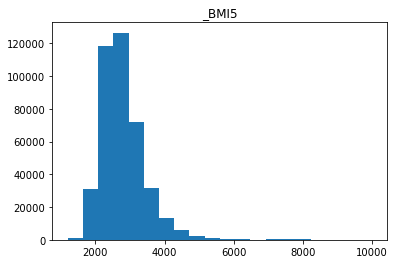

(array([24192., 19746.,     0., 22917., 24545.,     0., 25942., 30276.,
            0., 39881., 46209.,     0., 49794., 49264.,     0., 38362.,
        28232.,     0., 36760.,  5336.]),
 array([ 1.  ,  1.65,  2.3 ,  2.95,  3.6 ,  4.25,  4.9 ,  5.55,  6.2 ,
         6.85,  7.5 ,  8.15,  8.8 ,  9.45, 10.1 , 10.75, 11.4 , 12.05,
        12.7 , 13.35, 14.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_AGEG5YR')

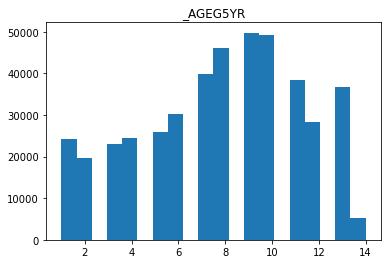

(array([ 76032.,      0., 145065.,      0.,      0., 136975.,      0.,
         58962.,      0.,      0.,  23175.,      0.,      0.,      0.,
             0.,    799.,      0.,      0.,      0.,    446.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'GENHLTH')

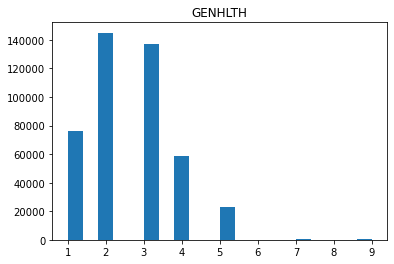

(array([296020.,      0., 107444.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,    602.,      0.,      0.,      0.,   1946.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXERANY2')

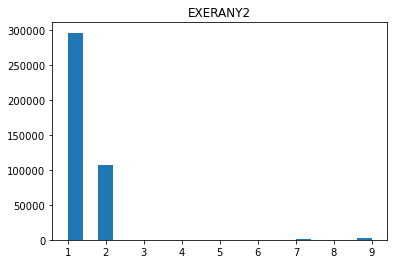

(array([  9026.,  15165.,  11774.,  21923.,   3775.,   3027.,   2131.,
         20294.,    349.,   1525.,   2473.,   4513., 163359.,  14042.,
          4109.,   5846.,      0.,      0.,      0.,  12447.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXRACT11')

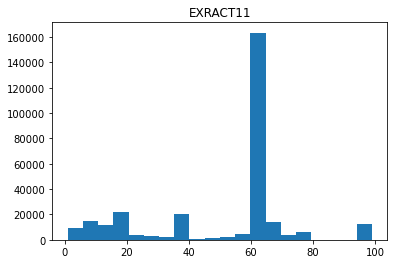

(array([2.07435e+05, 6.00000e+01, 8.24550e+04, 1.09200e+03, 1.23000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.27500e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.85000e+02]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXEROFT1')

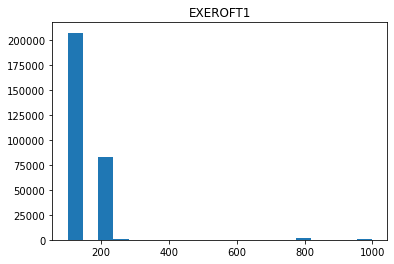

(array([1.62642e+05, 6.53480e+04, 1.61120e+04, 2.01000e+04, 2.37800e+03,
        8.15500e+03, 5.20000e+02, 6.21200e+03, 5.87000e+02, 8.00000e+00,
        2.33900e+03, 3.00000e+00, 1.61600e+03, 3.50000e+01, 2.96000e+02,
        5.52100e+03, 9.35000e+02, 1.00000e+00, 3.13000e+02, 5.44000e+02]),
 array([  1. ,  50.9, 100.8, 150.7, 200.6, 250.5, 300.4, 350.3, 400.2,
        450.1, 500. , 549.9, 599.8, 649.7, 699.6, 749.5, 799.4, 849.3,
        899.2, 949.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXERHMM1')

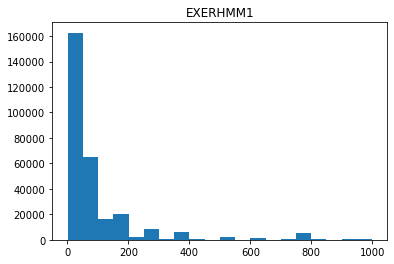

(array([ 6932., 15522., 12088., 18899.,  3730.,  2158.,  3610.,  9813.,
          355.,  2460.,  4730.,  6267., 42901., 23392., 18910., 13209.,
            0., 92337.,     0., 15967.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXRACT21')

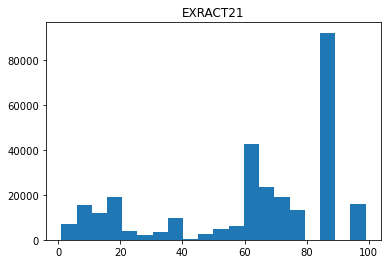

(array([1.29377e+05, 1.33000e+02, 6.46910e+04, 4.04000e+02, 9.10000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.81000e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.10000e+02]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXEROFT2')

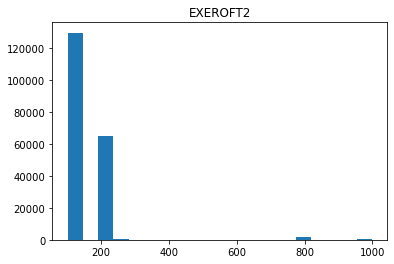

(array([9.9984e+04, 4.2540e+04, 9.2150e+03, 1.8350e+04, 1.9780e+03,
        7.8890e+03, 4.2800e+02, 5.8250e+03, 3.7700e+02, 4.0000e+00,
        2.0980e+03, 3.0000e+00, 1.6610e+03, 7.8000e+01, 3.1800e+02,
        3.9770e+03, 1.0620e+03, 4.0000e+00, 3.8400e+02, 5.5900e+02]),
 array([  1. ,  50.9, 100.8, 150.7, 200.6, 250.5, 300.4, 350.3, 400.2,
        450.1, 500. , 549.9, 599.8, 649.7, 699.6, 749.5, 799.4, 849.3,
        899.2, 949.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'EXERHMM2')

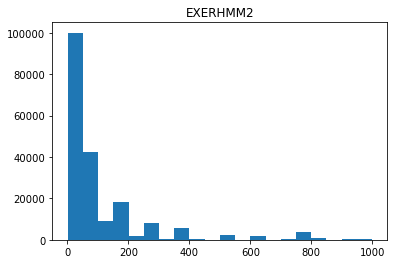

(array([ 57496.,      0., 153850.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   3095.,      0., 208460.,      0.,   2624.]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'ALCDAY5')

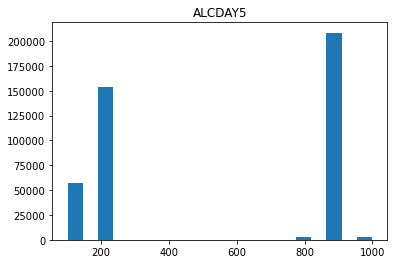

(array([1.97031e+05, 8.29300e+03, 1.33300e+03, 2.75000e+02, 1.06000e+02,
        1.43000e+02, 6.00000e+00, 2.40000e+01, 5.00000e+00, 9.00000e+00,
        8.00000e+00, 2.00000e+00, 1.90000e+01, 0.00000e+00, 2.00000e+00,
        2.83300e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.49000e+02]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'AVEDRNK2')

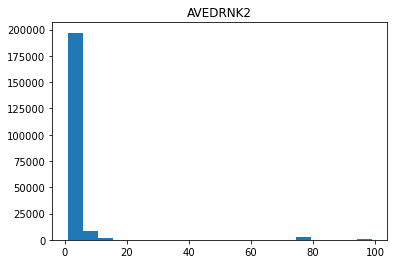

(array([1.76348e+05, 2.14520e+04, 3.96600e+03, 9.58000e+02, 2.88000e+02,
        2.29000e+02, 2.70000e+01, 4.30000e+01, 1.60000e+01, 1.20000e+01,
        2.00000e+01, 2.00000e+00, 1.30000e+01, 3.00000e+00, 4.00000e+00,
        5.52000e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.11600e+03]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'MAXDRNKS')

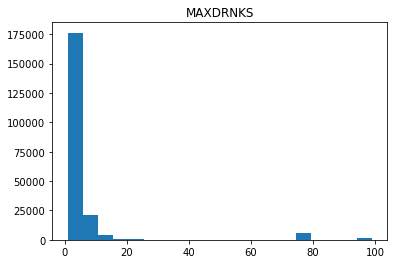

(array([365929.,  29248.,  24629.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  21650.]),
 array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360., 405., 450.,
        495., 540., 585., 630., 675., 720., 765., 810., 855., 900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'DROCDY3_')

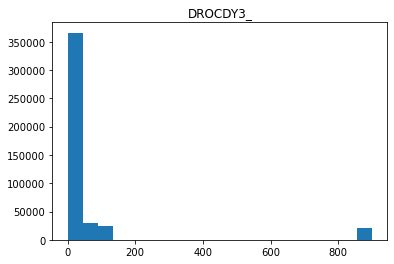

(array([365239.,      0.,  50606.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  25611.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_RFBING5')

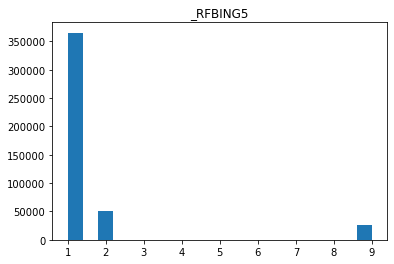

(array([4.14543e+05, 9.02000e+02, 1.50000e+02, 3.20000e+01, 6.00000e+01,
        8.00000e+00, 4.00000e+00, 5.00000e+00, 1.20000e+01, 2.00000e+00,
        5.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.57330e+04]),
 array([    0.,  4995.,  9990., 14985., 19980., 24975., 29970., 34965.,
        39960., 44955., 49950., 54945., 59940., 64935., 69930., 74925.,
        79920., 84915., 89910., 94905., 99900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_DRNKWEK')

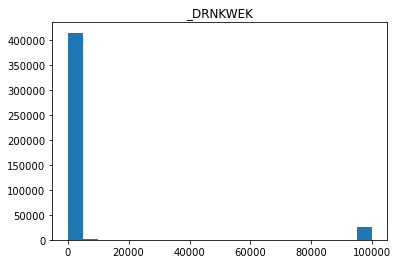

(array([393658.,      0.,  22065.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  25733.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_RFDRHV5')

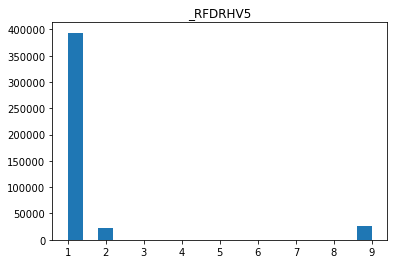

(array([211346.,      0., 208460.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   3095.,      0.,      0.,      0.,  18555.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'DRNKANY5')

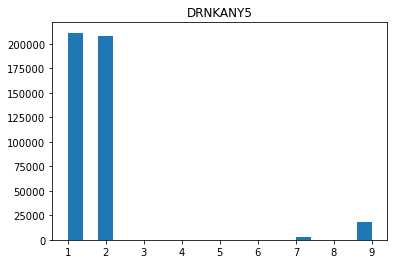

(array([ 68148.,  19424.,  12896.,   6428.,   2738.,  23338.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   5204.,      0., 301076.,      0.,   2204.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'MENTHLTH')

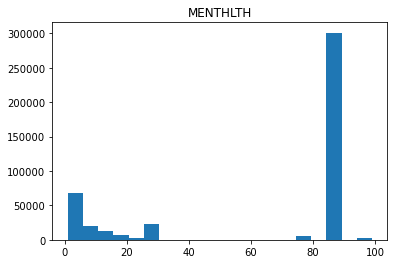

(array([1.83669e+05, 7.00000e+00, 9.47640e+04, 3.00000e+00, 9.24780e+04,
        1.74700e+04, 2.79000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.62040e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.13900e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.29300e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FRUIT1')

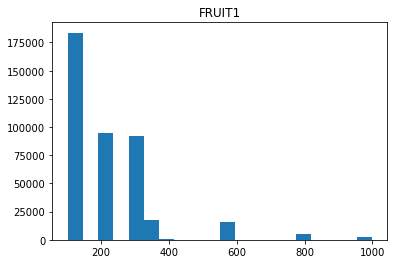

(array([2.38220e+04, 1.00000e+00, 1.31225e+05, 1.00000e+00, 1.75440e+05,
        2.35600e+03, 2.70000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        6.86370e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.38600e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.18600e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FVBEANS')

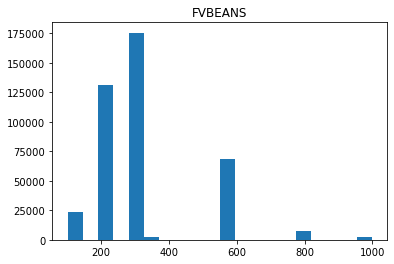

(array([7.86160e+04, 2.00000e+00, 1.46913e+05, 5.00000e+00, 1.35568e+05,
        1.08850e+04, 1.00000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.14180e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.42700e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.21100e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FVGREEN')

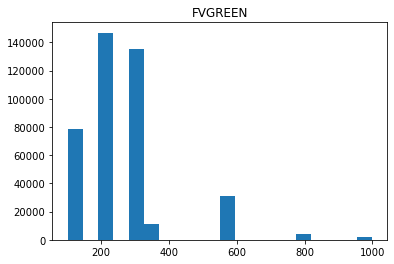

(array([2.81030e+04, 0.00000e+00, 1.40878e+05, 2.00000e+00, 1.71036e+05,
        2.75300e+03, 1.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.94080e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.98900e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.15400e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FVORANG')

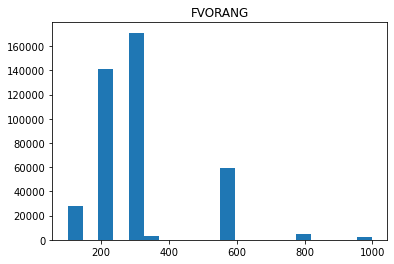

(array([1.32144e+05, 2.00000e+00, 1.25760e+05, 7.00000e+00, 1.08517e+05,
        2.58800e+04, 2.31000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.45200e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.79500e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.53000e+03]),
 array([101. , 145.9, 190.8, 235.7, 280.6, 325.5, 370.4, 415.3, 460.2,
        505.1, 550. , 594.9, 639.8, 684.7, 729.6, 774.5, 819.4, 864.3,
        909.2, 954.1, 999. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'VEGETAB1')

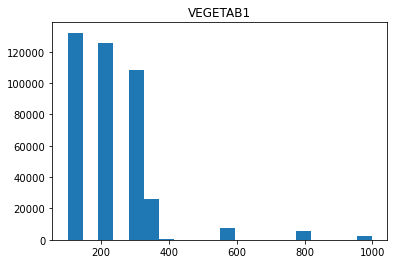

(array([4.01826e+05, 2.90700e+03, 6.90000e+01, 1.50000e+01, 1.50000e+01,
        6.00000e+00, 1.50000e+01, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.20000e+01]),
 array([   0.,  495.,  990., 1485., 1980., 2475., 2970., 3465., 3960.,
        4455., 4950., 5445., 5940., 6435., 6930., 7425., 7920., 8415.,
        8910., 9405., 9900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'FRUTDA1_')

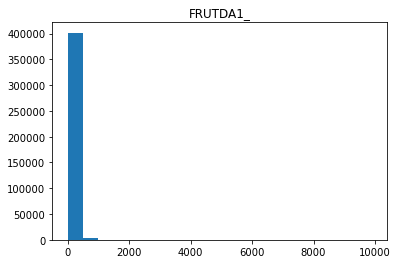

(array([4.01233e+05, 2.53000e+02, 9.00000e+00, 7.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   0.,  495.,  990., 1485., 1980., 2475., 2970., 3465., 3960.,
        4455., 4950., 5445., 5940., 6435., 6930., 7425., 7920., 8415.,
        8910., 9405., 9900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'BEANDAY_')

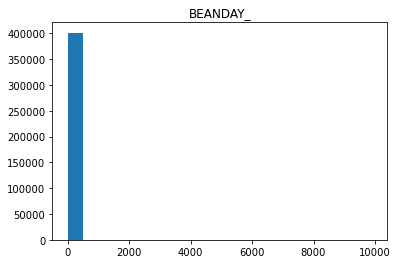

(array([4.02749e+05, 7.19000e+02, 1.60000e+01, 5.00000e+00, 5.00000e+00,
        2.00000e+00, 7.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   0.,  495.,  990., 1485., 1980., 2475., 2970., 3465., 3960.,
        4455., 4950., 5445., 5940., 6435., 6930., 7425., 7920., 8415.,
        8910., 9405., 9900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'GRENDAY_')

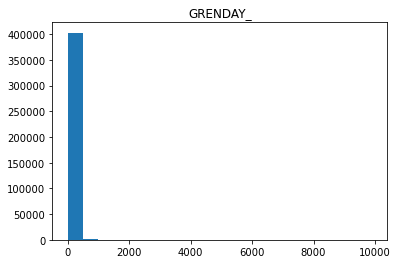

(array([4.01934e+05, 2.38000e+02, 1.00000e+01, 6.00000e+00, 1.00000e+00,
        3.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   0.,  495.,  990., 1485., 1980., 2475., 2970., 3465., 3960.,
        4455., 4950., 5445., 5940., 6435., 6930., 7425., 7920., 8415.,
        8910., 9405., 9900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'ORNGDAY_')

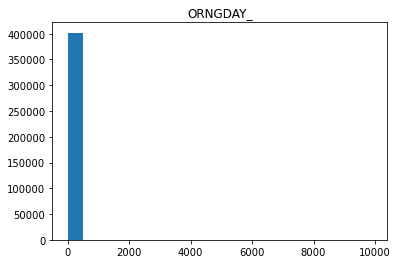

(array([3.98918e+05, 1.01200e+03, 2.30000e+01, 1.10000e+01, 7.00000e+00,
        6.00000e+00, 8.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.00000e+00]),
 array([   0.,  495.,  990., 1485., 1980., 2475., 2970., 3465., 3960.,
        4455., 4950., 5445., 5940., 6435., 6930., 7425., 7920., 8415.,
        8910., 9405., 9900.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'VEGEDA1_')

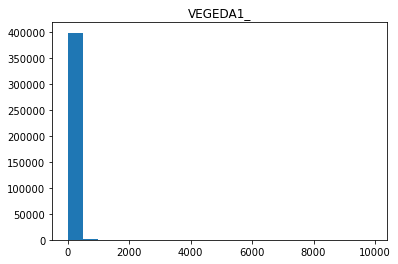

(array([3.96887e+05, 7.39000e+02, 6.20000e+01, 9.00000e+00, 2.10000e+01,
        3.00000e+00, 4.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 1.20000e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.,   750.,  1500.,  2250.,  3000.,  3750.,  4500.,  5250.,
         6000.,  6750.,  7500.,  8250.,  9000.,  9750., 10500., 11250.,
        12000., 12750., 13500., 14250., 15000.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_FRUTSUM')

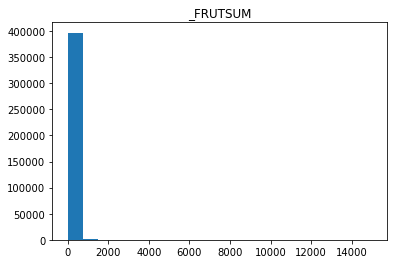

(array([3.89419e+05, 8.58000e+02, 3.10000e+01, 1.10000e+01, 2.00000e+00,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        7.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([    0.  ,   996.45,  1992.9 ,  2989.35,  3985.8 ,  4982.25,
         5978.7 ,  6975.15,  7971.6 ,  8968.05,  9964.5 , 10960.95,
        11957.4 , 12953.85, 13950.3 , 14946.75, 15943.2 , 16939.65,
        17936.1 , 18932.55, 19929.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_VEGESUM')

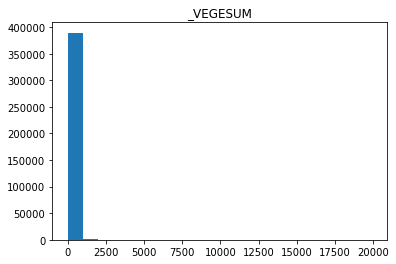

(array([247817.,      0., 149928.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  43711.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_FRTLT1')

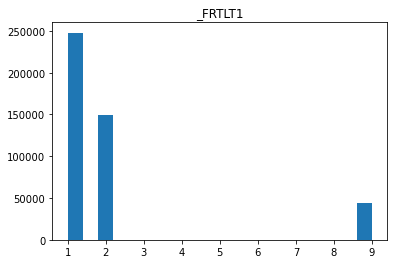

(array([309561.,      0.,  80778.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  51117.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_VEGLT1')

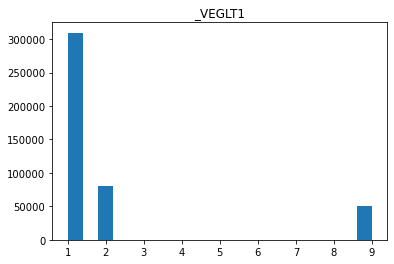

(array([178188.,      0.,   3271.,      0.,      0., 254318.,      0.,
          4312.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,    862.,      0.,      0.,      0.,    504.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'BPHIGH4')

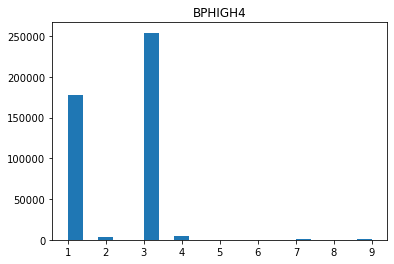

(array([1.49034e+05, 0.00000e+00, 2.88330e+04, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.58000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.30000e+01]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'BPMEDS')

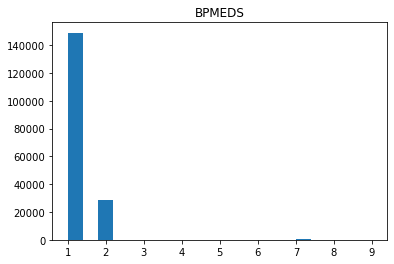

(array([3.82302e+05, 0.00000e+00, 4.96730e+04, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        9.27900e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.02000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'BLOODCHO')

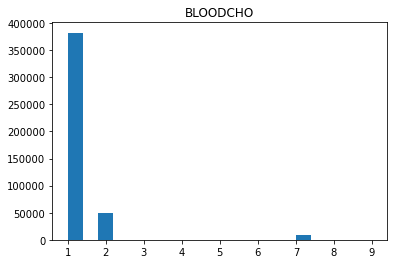

(array([2.93355e+05, 0.00000e+00, 4.35960e+04, 0.00000e+00, 0.00000e+00,
        2.59720e+04, 0.00000e+00, 1.35230e+04, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.58400e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.72000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'CHOLCHK')

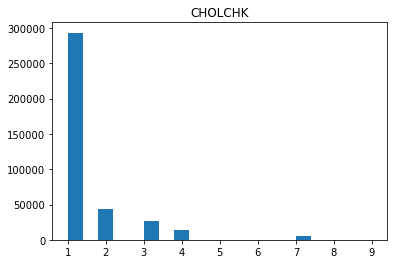

(array([159970.,      0., 218771.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   3037.,      0.,      0.,      0.,    524.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'TOLDHI2')

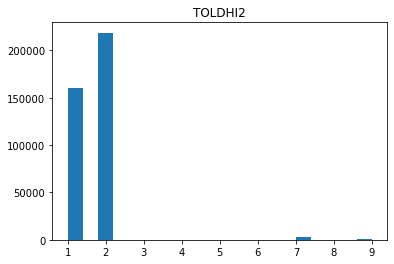

(array([2.54720e+04, 0.00000e+00, 4.13755e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.03800e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.91000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'CVDINFR4')

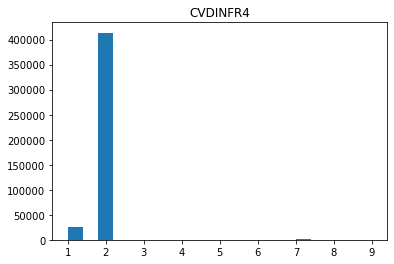

(array([2.52900e+04, 0.00000e+00, 4.12349e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.59100e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.25000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'CVDCRHD4')

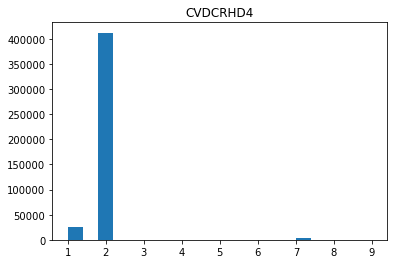

(array([1.82690e+04, 0.00000e+00, 4.21897e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.14600e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.44000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'CVDSTRK3')

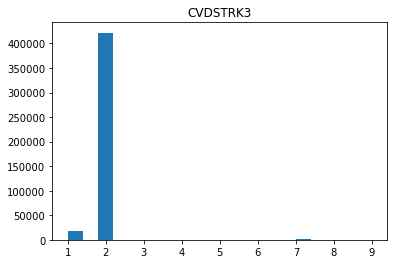

(array([ 38633.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0., 398881.]),
 array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
        1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_MICHD')

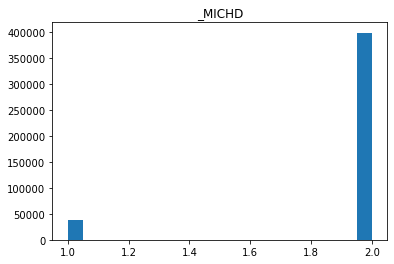

(array([4.1776e+04, 0.0000e+00, 3.9842e+05, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1040e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5500e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'CHCSCNCR')

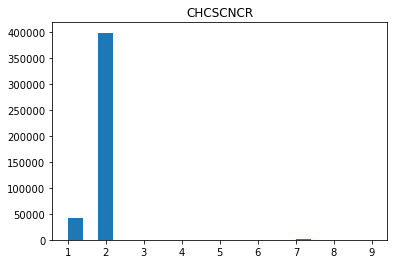

(array([5.72560e+04, 0.00000e+00, 3.60800e+03, 0.00000e+00, 0.00000e+00,
        3.72104e+05, 0.00000e+00, 7.69000e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.98000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.93000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'DIABETE3')

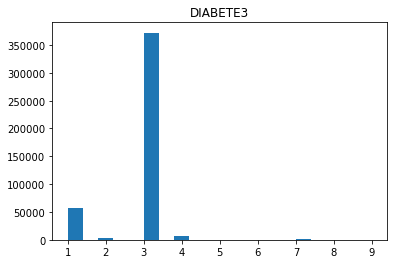

(array([184299.,      0., 239608.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   1832.,      0.,      0.,      0.,   1462.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'SMOKE100')

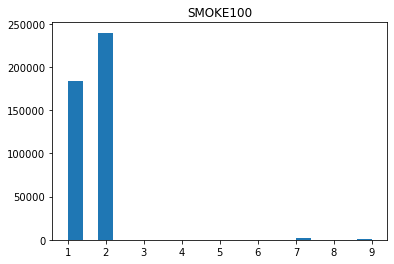

(array([4.35830e+04, 0.00000e+00, 1.79980e+04, 0.00000e+00, 0.00000e+00,
        1.22277e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        8.60000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.49000e+02]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'SMOKDAY2')

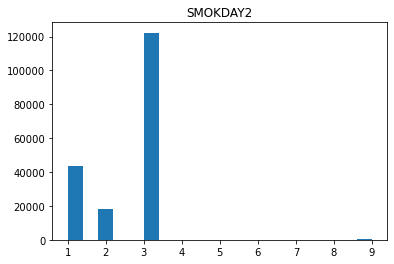

(array([7.52200e+03, 0.00000e+00, 6.05500e+03, 0.00000e+00, 0.00000e+00,
        4.11021e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.43000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.82500e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'USENOW3')

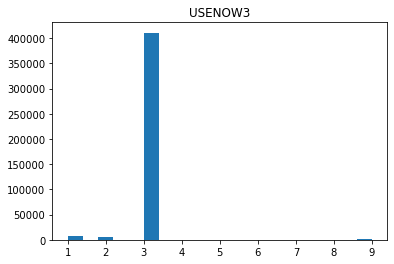

(array([ 43583.,      0.,  17998.,      0.,      0., 122277.,      0.,
        239608.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  17990.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_SMOKER3')

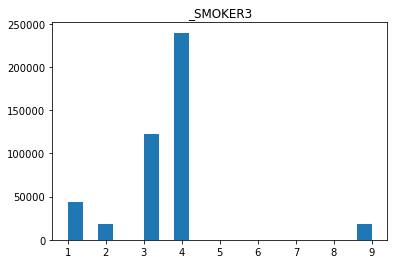

(array([361885.,      0.,  61581.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  17990.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '_RFSMOK3')

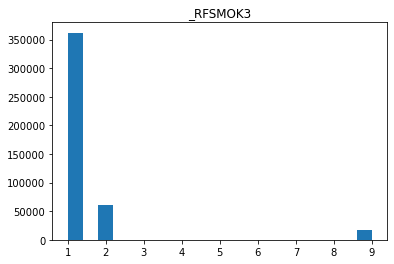

(array([ 76890.,  21149.,  14022.,   6117.,   3622.,  35770.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   7664.,      0., 274143.,      0.,   2078.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'PHYSHLTH')

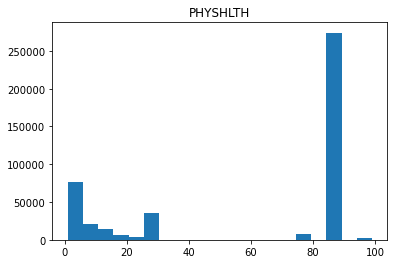

In [73]:
# Plot histograms for each feature
for feature in data:
    plt.hist(df[feature], bins=20)
    plt.title(feature)
    plt.show()

In [74]:
# Define the columns of interest
cols = ['_BMI5', 'CVDSTRK3','ALCDAY5','EXERANY2','MENTHLTH','EXRACT11','AVEDRNK2','BPMEDS','SMOKDAY2']

# Extract the rows with valid values for the columns of interest
df_clean = data.loc[data[cols].notnull().all(axis=1)]

# Standardize the columns of interest
df_clean_std = (df_clean[cols] - df_clean[cols].mean()) / df_clean[cols].std()

<AxesSubplot:xlabel='_BMI5', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of _BMI5 Before Cleaning')

<AxesSubplot:xlabel='_BMI5', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of _BMI5 After Cleaning')

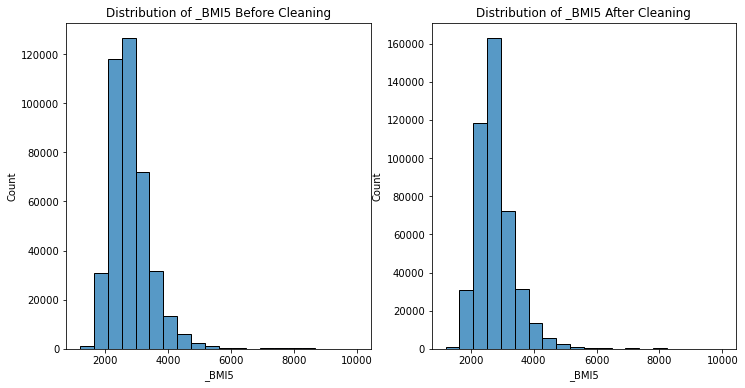

In [75]:
# Plot the distribution of _BMI5 before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['_BMI5'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of _BMI5 Before Cleaning')
sns.histplot(df_clean['_BMI5'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of _BMI5 After Cleaning')
plt.show()

<AxesSubplot:xlabel='CVDSTRK3', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CVDSTRK3 Before Cleaning')

<AxesSubplot:xlabel='CVDSTRK3', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CVDSTRK3 After Cleaning')

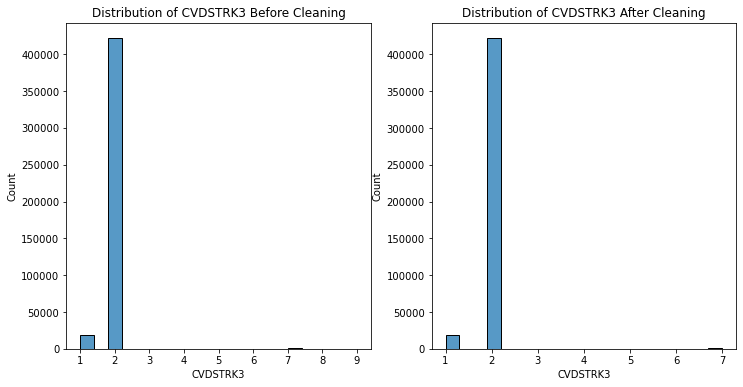

In [76]:
# Plot the distribution of PHYSHLTH before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['CVDSTRK3'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of CVDSTRK3 Before Cleaning')
sns.histplot(df_clean['CVDSTRK3'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of CVDSTRK3 After Cleaning')
plt.show()

<AxesSubplot:xlabel='SMOKDAY2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of SMOKDAY2 Before Cleaning')

<AxesSubplot:xlabel='SMOKDAY2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of SMOKDAY2 After Cleaning')

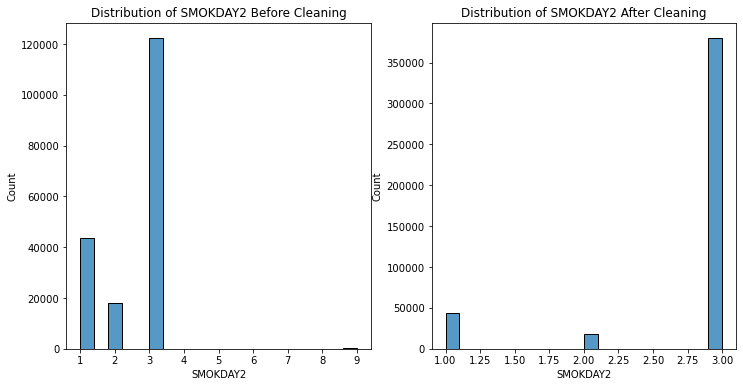

In [77]:
# Plot the distribution of PHYSHLTH before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['SMOKDAY2'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of SMOKDAY2 Before Cleaning')
sns.histplot(df_clean['SMOKDAY2'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of SMOKDAY2 After Cleaning')
plt.show()

<AxesSubplot:xlabel='EXRACT11', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of EXRACT11 Before Cleaning')

<AxesSubplot:xlabel='EXRACT11', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of EXRACT11 After Cleaning')

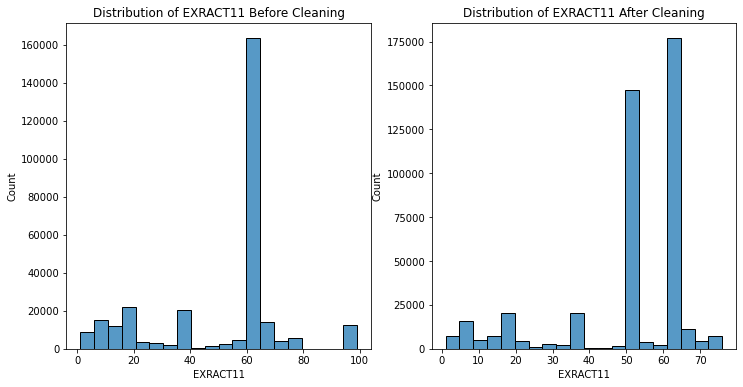

In [78]:
# Plot the distribution of PHYSHLTH before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['EXRACT11'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of EXRACT11 Before Cleaning')
sns.histplot(df_clean['EXRACT11'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of EXRACT11 After Cleaning')
plt.show()

<AxesSubplot:xlabel='AVEDRNK2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of AVEDRNK2 Before Cleaning')

<AxesSubplot:xlabel='AVEDRNK2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of AVEDRNK2 After Cleaning')

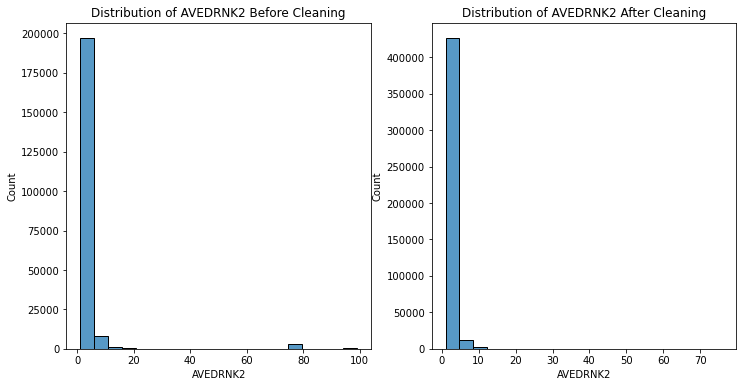

In [79]:
# Plot the distribution of AVEDRNK2 before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['AVEDRNK2'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of AVEDRNK2 Before Cleaning')
sns.histplot(df_clean['AVEDRNK2'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of AVEDRNK2 After Cleaning')
plt.show()

<AxesSubplot:xlabel='MENTHLTH', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MENTHLTH Before Cleaning')

<AxesSubplot:xlabel='MENTHLTH', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MENTHLTH After Cleaning')

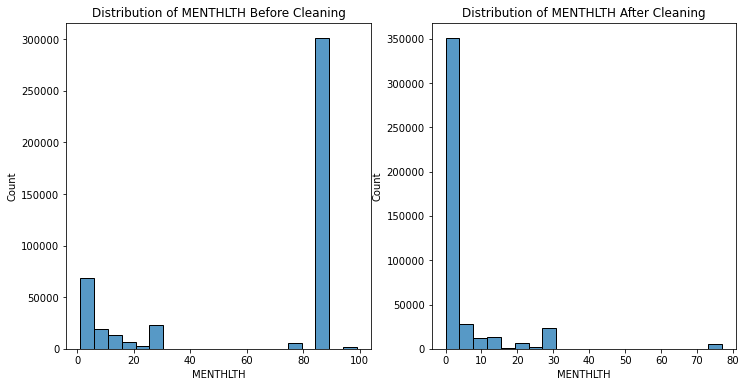

In [80]:
# Plot the distribution of AVEDRNK2 before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['MENTHLTH'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of MENTHLTH Before Cleaning')
sns.histplot(df_clean['MENTHLTH'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of MENTHLTH After Cleaning')
plt.show()

<AxesSubplot:xlabel='EXERANY2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of EXERANY2 Before Cleaning')

<AxesSubplot:xlabel='EXERANY2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of EXERANY2 After Cleaning')

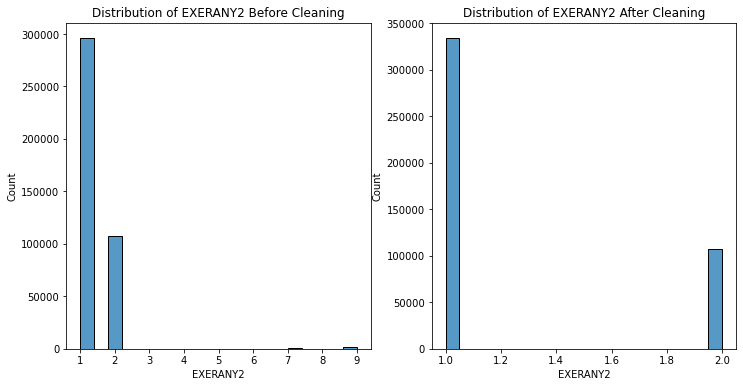

In [81]:
# Plot the distribution of AVEDRNK2 before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['EXERANY2'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of EXERANY2 Before Cleaning')
sns.histplot(df_clean['EXERANY2'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of EXERANY2 After Cleaning')
plt.show()

In [82]:
data['_SMOKER3']=np.where(data['_SMOKER3'] == 2, 1, data['_SMOKER3'])
data['_SMOKER3']=np.where(data['_SMOKER3'] == 3, 2, data['_SMOKER3'])
data['_SMOKER3']=np.where(data['_SMOKER3'] == 4, 2, data['_SMOKER3'])
data['_SMOKER3']=np.where(data['_SMOKER3'] == 9, 2, data['_SMOKER3'])


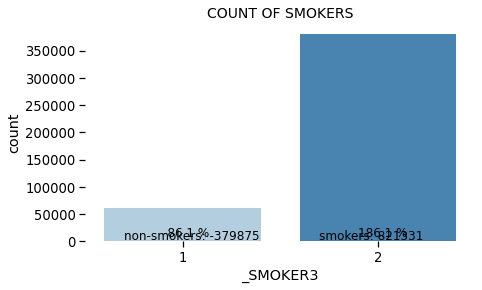

In [83]:
# The frequency of smokers

yes = data._SMOKER3.sum()
no = len(data)-yes

# Percentage
yes_perc = round(yes/len(data)*100, 1)
no_perc = round(no/len(data)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('_SMOKER3',data=data, palette="Blues")
plt.annotate('non-smokers: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('smokers: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF SMOKERS', size=14)
#Removing the frame
plt.box(False);

In [84]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

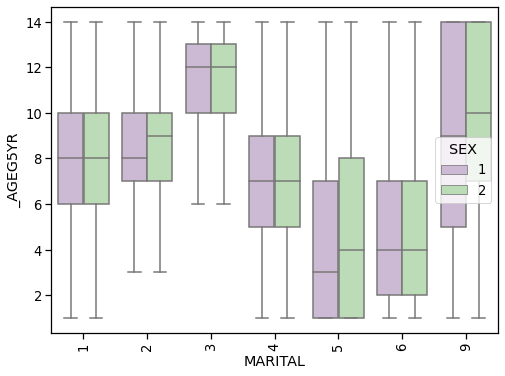

In [85]:
boxplot_variation('MARITAL','_AGEG5YR', 'SEX',8)

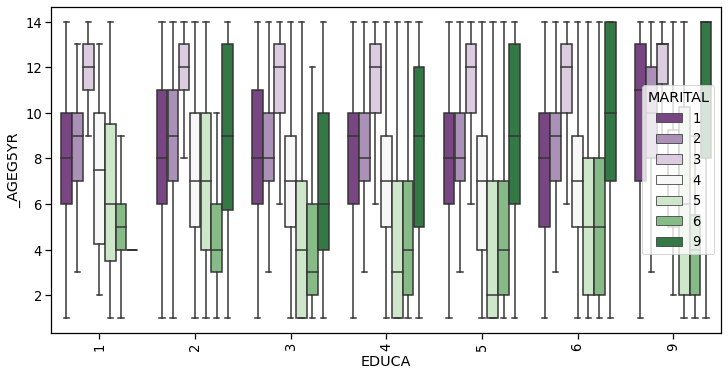

In [86]:
boxplot_variation('EDUCA','_AGEG5YR', 'MARITAL',12)

(<Figure size 2160x1440 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

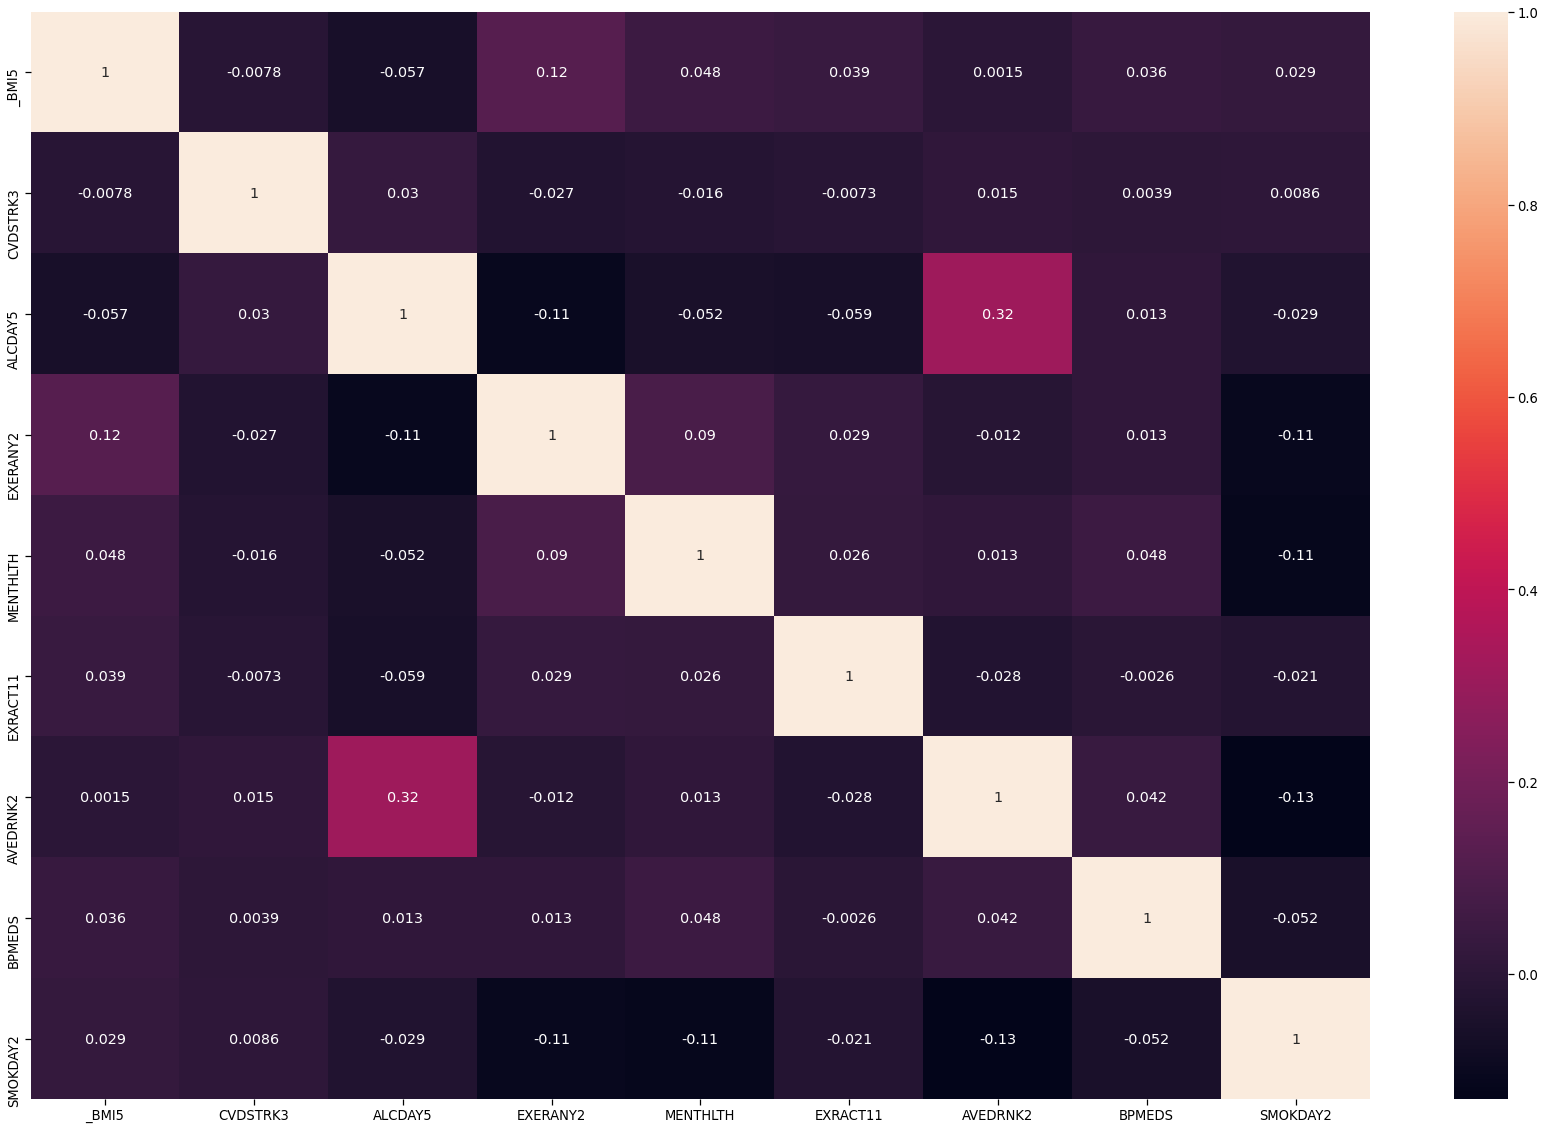

In [87]:
plt.subplots(figsize=(30,20))
sns.heatmap(data[cols].corr(), annot=True)
plt.show()

In [88]:
#X = data[['SEX', 'MARITAL', '_INCOMG', 'EDUCA']]
## Standardize the features
#scaler = StandardScaler()
#X_std = scaler.fit_transform(X)

In [89]:
## Cluster the data
#kmeans = KMeans(n_clusters=3, random_state=42).fit(X_std)
#labels = kmeans.labels_

In [90]:
## Visualize the clusters
#fig, ax = plt.subplots(figsize=(8, 6))
#plt.scatter(X_std[:,0], X_std[:,1], c=labels, cmap='viridis')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.title('K-means Clustering (K=3)')
#plt.show()

In [91]:
#X = data[['MENTHLTH', 'EXERANY2', 'AVEDRNK2','SMOKDAY2']]
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#kmeans = KMeans(n_clusters=4, random_state=42)
#kmeans.fit(X_scaled)
#data['cluster'] = kmeans.labels_
#plt.scatter(data[data['cluster'] == 0]['MENTHLTH'], data[data['cluster'] == 0]['ALCDAY5'], c='red', label='Cluster 0')
#plt.scatter(data[data['cluster'] == 1]['MENTHLTH'], data[data['cluster'] == 1]['ALCDAY5'], c='blue', label='Cluster 1')
#plt.scatter(data[data['cluster'] == 2]['MENTHLTH'], data[data['cluster'] == 2]['ALCDAY5'], c='green', label='Cluster 2')
#plt.scatter(data[data['cluster'] == 3]['MENTHLTH'], data[data['cluster'] == 3]['ALCDAY5'], c='orange', label='Cluster 3')
#plt.xlabel('Mental health (days)')
#plt.ylabel('Alcohol consumption (days)')
#plt.legend()
#plt.show()

In [92]:
#data.to_csv('new_datapfe.csv', index=False)

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

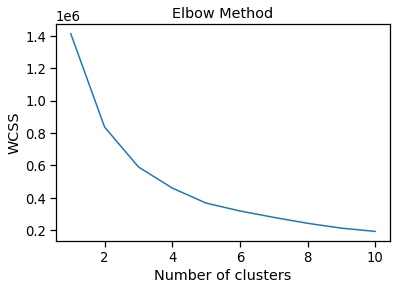

In [93]:
features = ['_BMI5', 'SEX', 'GENHLTH','AVEDRNK2','EXERANY2','MENTHLTH','EXRACT11','PHYSHLTH','BPMEDS','SMOKDAY2']
daf = data[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Behavioral Segmentation Clustering')

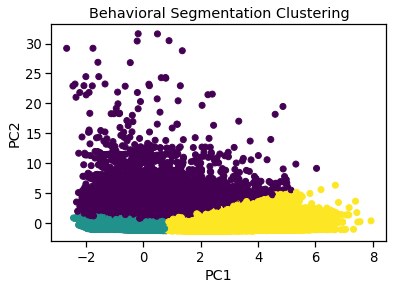

In [94]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Behavioral Segmentation Clustering')
plt.show()

In [95]:
for i in range(0, 2):
    cluster = df_pca[df_pca['cluster'] == i].iloc[:, :-1]
    centroid = pd.DataFrame(kmeans.cluster_centers_[i]).T
    centroid.columns = cluster.columns
    print(f'Cluster {i}:\n')
    print(f'Centroid:\n{centroid}')
    print(f'Size: {len(cluster)}')
    print(f'Mean:\n{cluster.mean()}\n')
    print(f'Standard Deviation:\n{cluster.std()}\n')
    print(f'Minimum:\n{cluster.min()}\n')
    print(f'Maximum:\n{cluster.max()}\n')

Cluster 0:

Centroid:
        PC1       PC2
0 -0.087641  1.826169
Size: 66114
Mean:
PC1   -0.081389
PC2    1.834721
dtype: float64

Standard Deviation:
PC1    0.921242
PC2    1.339936
dtype: float64

Minimum:
PC1   -2.668704
PC2    0.450373
dtype: float64

Maximum:
PC1     6.037532
PC2    31.635311
dtype: float64

Cluster 1:

Centroid:
        PC1       PC2
0 -0.648632 -0.338468
Size: 289817
Mean:
PC1   -0.649256
PC2   -0.336098
dtype: float64

Standard Deviation:
PC1    0.689306
PC2    0.621020
dtype: float64

Minimum:
PC1   -2.430151
PC2   -1.352971
dtype: float64

Maximum:
PC1    0.825841
PC2    1.190964
dtype: float64



This output is showing the results of clustering for one of the clusters (in this case, Cluster 0, 1 and 2) generated by the algorithm.

* Centroid: The centroid is the geometric center of the cluster, calculated as the average of all the points in the cluster. The values for the two principal components (PC1 and PC2) are shown.
* Size: The number of data points assigned to this cluster.
* Mean: The mean is the average value of each feature (in this case, PC1 and PC2) for all the data points in this cluster.
* Standard Deviation: The standard deviation is a measure of how spread out the data points are from the mean.
* Minimum: The minimum values for PC1 and PC2 for all the data points in this cluster.
* Maximum: The maximum values for PC1 and PC2 for all the data points in this cluster.

This information helps to understand the characteristics of this particular cluster and how it differs from the other clusters. It can be used to gain insights into the underlying patterns in the data and to make decisions about how to segment the population.

In [96]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)


Cluster Sizes:
Cluster 0: 66114
Cluster 1: 289817
Cluster 2: 85525

Cluster Means:
               _BMI5       SEX   GENHLTH  AVEDRNK2  EXERANY2   MENTHLTH  \
cluster                                                                   
0        2813.079624  1.138095  2.491227  3.336918  1.216717   3.277475   
1        2705.185531  1.644086  2.202880  1.223479  1.154422   1.472760   
2        3133.083094  1.686595  3.880830  1.214323  1.565472  13.969974   

          EXRACT11   PHYSHLTH    BPMEDS  SMOKDAY2  
cluster                                            
0        45.716725   1.743292  1.243005  2.225610  
1        52.109445   1.089239  1.019992  2.936563  
2        54.035318  16.627992  1.081532  2.583970  


In [97]:
# Identify the most common values of the categorical features for each cluster
#cat_cols = ['_BMI5', 'SEX', 'GENHLTH','AVEDRNK2','EXERANY2','MENTHLTH','EXRACT11','PHYSHLTH','BPMEDS','SMOKDAY2']

#for col in cat_cols:
#    print(f'\nMost Common Values of {col} by Cluster:')
#    for i in range(len(cluster_sizes)):
 #       print(f'Cluster {i}:')
 #       print(clustered_data.loc[clustered_data['cluster'] == i, col].value_counts(normalize=True).head())

In [98]:
#!pip install pandas_profiling

In [99]:
#from pandas_profiling import ProfileReport
#for i in range(kmeans.n_clusters):
#    cluster = clustered_data.loc[clustered_data['cluster'] == i]
 #   profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
  #  profile.to_file(f"cluster_{i}_profile.html")

Text(0.5, 1.0, 'Distribution Of The Clusters')

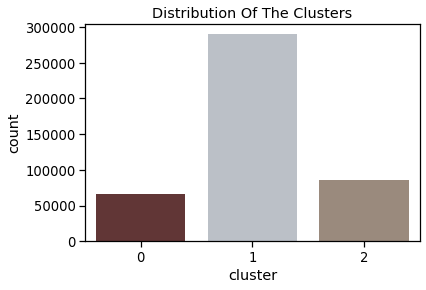

In [100]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_pca['cluster'], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Text(0.5, 1.0, "Cluster's Profile Based On the mental health And alcohol consumption")

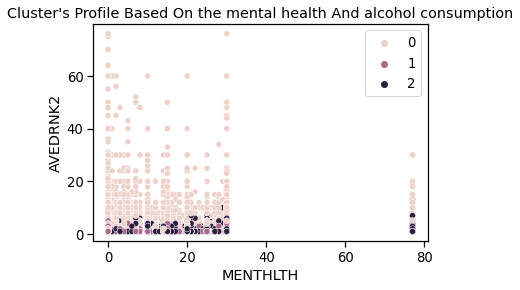

In [101]:
pl = sns.scatterplot(data = data,x=data["MENTHLTH"], y=data["AVEDRNK2"],hue=df_pca['cluster'])
pl.set_title("Cluster's Profile Based On the mental health And alcohol consumption")
plt.legend()
plt.show()

In [102]:
# Select the relevant features for behavioral segmentation
behavioral_features = ['_BMI5', 'CVDSTRK3','ALCDAY5','EXERANY2','MENTHLTH','EXRACT11','AVEDRNK2','BPMEDS','SMOKDAY2']

# Preprocess the data
X = data[behavioral_features]

In [103]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)


In [104]:
# Perform PCA to reduce the number of dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)

In [105]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(principal_components)
cluster_labels = kmeans.labels_
#data['Cluster'] = kmeans.labels_

In [106]:
#sns.scatterplot(x='ALCDAY5', y='MENTHLTH', hue='Cluster', data=data)

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.5, 1.0, 'K-means Clustering of LLCP2015 Dataset')

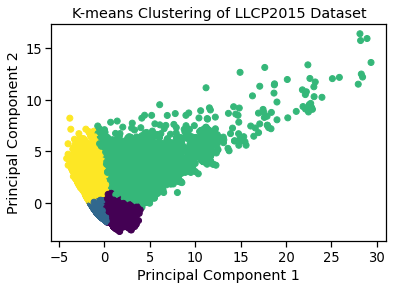

In [107]:
# Visualize the clusters
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of LLCP2015 Dataset')
plt.show()

###  DBSCAN Algorithm:

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density-based clustering algorithm used in machine learning to group together data points that are closely packed together in a high-dimensional space.

The algorithm works by defining a neighborhood around each data point and identifying clusters based on the density of the points in the neighborhood. The neighborhood is defined by two parameters: epsilon (ε) and minimum points (minPts).

Points that are within ε distance of each other are considered to be in the same neighborhood. The minimum points parameter specifies the minimum number of points required to form a dense region, which is referred to as a core point.

Points that are not part of a dense region but are within ε distance of a core point are considered to be part of a cluster. Points that are not part of any cluster are considered noise.

The DBSCAN algorithm is robust to outliers and can handle clusters of arbitrary shapes and sizes. However, it requires careful parameter tuning, and the clustering results can be sensitive to the choice of ε and minPts.

DBSCAN and k-means are both clustering algorithms used in machine learning, but they differ in several ways:

* Clustering method: DBSCAN is a density-based clustering algorithm that groups together data points that are closely packed together in a high-dimensional space, while k-means is a centroid-based clustering algorithm that seeks to minimize the sum of squared distances between each point and its assigned cluster center.

* Handling noise and outliers: DBSCAN is able to handle noise and outliers effectively by identifying them as individual data points that do not belong to any cluster, whereas k-means can be sensitive to outliers and may assign them to the nearest cluster.

In [108]:
#from sklearn.cluster import DBSCAN

In [109]:
#features = ['_BMI5', 'SEX', 'GENHLTH','AVEDRNK2','EXERANY2','MENTHLTH','EXRACT11','PHYSHLTH','BPMEDS','SMOKDAY2']
#daf = data[features]

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(daf)

first, we use NearestNeighbors to calculate the distance to the kth nearest neighbor for each point in our dataset X. We then sort and plot these distances to visualize their distribution. The elbow point in this plot can be used as a suitable value for the eps parameter in DBSCAN. Note that this is a subjective measure and may require manual inspection.

In [110]:
#from sklearn.neighbors import NearestNeighbors
#import matplotlib.pyplot as plt

# Calculate the distance to the kth nearest neighbor for each point
#k = 5
#neigh = NearestNeighbors(n_neighbors=k)
#nbrs = neigh.fit(daf)
#distances, indices = nbrs.kneighbors(daf)

# Plot the sorted distances
#distances = np.sort(distances[:,k-1], axis=0)
#plt.plot(distances)

# Determine the elbow point
# Note: this is a subjective measure and may require manual inspection
#eps = 15 # change this to the elbow point
#plt.axhline(y=eps, color='r', linestyle='-')
#plt.show()

D is the dimension of the dataset and alpha is a value between 0 and 1 that determines the minimum percentage of points that should be in a cluster. For example, if we set alpha to 0.05, it means that we want at least 5% of the points to be in a cluster.

In [111]:
#D = len(daf.columns)  # dimension of the dataset
#alpha = 0.05  # minimum percentage of points in a cluster
#min_samples = int(np.ceil(D * (1 + alpha)))
#print("min_samples:", min_samples)

Epsilon (eps) is the radius of the neighborhood around each point. It determines how close points must be to each other to be considered part of the same cluster. If eps is too small, then some points may be left as noise. If eps is too large, then unrelated points may be grouped together. One way to determine a suitable value for eps is to plot a k-distance graph, where k is the minimum number of points required to form a dense region (i.e., the value of min_samples). The value of eps should be chosen as the distance at which the curve has a sharp change in slope, indicating a natural boundary between dense and sparse regions.

Min_samples is the minimum number of points required to form a dense region. It determines the minimum size of a cluster. If min_samples is too small, then small, spurious clusters may be formed. If min_samples is too large, then some points may be left as noise. A good rule of thumb is to set min_samples equal to the dimensionality of your dataset plus one. For example, if your dataset has five dimensions, then a value of six for min_samples might be appropriate.

In [112]:
# apply DBSCAN clustering algorithm
#dbscan = DBSCAN(eps=15, min_samples=11)
#dbscan.fit(X_scaled)

In [113]:
# visualize the clusters
#plt.scatter(X['GENHLTH'], X['PHYSHLTH'], c=dbscan.labels_, cmap='viridis')
#plt.xlabel('General health')
#plt.ylabel('Physical health')
#plt.show()

# print number of clusters and number of noisy points
#print('Number of clusters: {}'.format(len(set(dbscan.labels_))))
#print('Number of noisy points: {}'.format(np.sum(np.array(dbscan.labels_)==-1)))

In [114]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import pairwise_distances

In [115]:
features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','SMOKDAY2','PHYSHLTH','VEGETAB1','FRUIT1','MENTHLTH','GENHLTH','EDUCA','_INCOMG']
daf = data[features]
# Sampling
sample_size = 1000
df_sample = daf.sample(n=sample_size, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample)

# Split data into training and testing sets using cross-validation sampling
#X_train, X_test = train_test_split(X_scaled, test_size=0.1, random_state=42)

# Use PCA to reduce the dimensionality of the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Compute a distance matrix
dist = pairwise_distances(X_scaled)

# Find a suitable epsilon value
min_samples = 10
knn_distances = np.sort(dist, axis=0)[:, min_samples]
knn_distances = knn_distances[knn_distances != 0]
eps = np.mean(knn_distances)

# Cluster the data using DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X_scaled)

# Evaluate the clustering results
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 1
Estimated number of noise points: 1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'DBSCAN Clustering of LLCP2015 Dataset')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

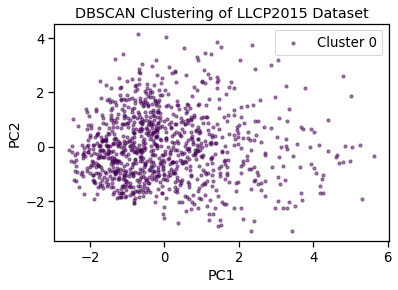

In [116]:
# Visualize the clustering
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
colors = plt.cm.get_cmap('viridis', n_clusters)

for i in range(n_clusters):
    if i == -1:
        # Black used for noise.
        color = 'k'
    else:
        color = colors(i)
    # Plot the points in each cluster
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], s=10, c=color, alpha=0.5, label='Cluster {}'.format(i))

plt.title('DBSCAN Clustering of LLCP2015 Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#### Hierarchical clustering:

* Hierarchical clustering does not require the number of clusters to be specified in advance. Instead, it builds a hierarchy of clusters by iteratively merging or dividing clusters based on some similarity measure between the data points. There are two types of hierarchical clustering: agglomerative and divisive.
* Agglomerative clustering starts with each data point as a separate cluster and merges them together until there is only one cluster.

In [117]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load the dataset
features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','SMOKDAY2','PHYSHLTH','VEGETAB1','FRUIT1','MENTHLTH','GENHLTH','EDUCA','_INCOMG']
daf = data[features]

# Sampling
sample_size = 10000
df_sample = daf.sample(n=sample_size, random_state=42)

# Standardize the data
df_std = (df_sample - df_sample.mean()) / df_sample.std()

# Perform t-SNE embedding on the data
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_std)


In [118]:
# Perform hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_cluster.fit(df_tsne)

# Add the cluster labels to the dataset
df_sample['cluster_labels'] = agg_cluster.labels_

# Analyze the clusters
cluster_profile = df_sample.groupby('cluster_labels').mean()
print(cluster_profile)

AgglomerativeClustering(n_clusters=5)

                      _BMI5       SEX  _AGEG5YR   MARITAL    EXEROFT1  \
cluster_labels                                                          
0               2933.698948  1.908786  8.221328  2.629779  103.969484   
1               2775.401169  1.252686  6.625046  2.929233  150.672101   
2               2853.552293  1.001033  8.441116  1.309401  103.682335   
3               2748.368534  2.000000  8.098204  2.117365  215.174850   
4               2661.033589  2.000000  7.865633  1.289406  103.645995   

                MAXDRNKS  SMOKDAY2  PHYSHLTH    VEGETAB1      FRUIT1  \
cluster_labels                                                         
0               2.087860  2.953387  7.992287  178.796445  168.286385   
1               3.211189  2.198592  5.049278  230.305669  233.738422   
2               2.606921  2.978306  1.186467  202.770145  199.675620   
3               2.147305  2.956886  1.820359  235.651497  204.578443   
4               2.155039  2.989018  1.202842  220.755168

In [140]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate the evaluation metrics for each model
kmeans_silhouette = silhouette_score(principal_components, cluster_labels)
kmeans_calinski = calinski_harabasz_score(principal_components, cluster_labels)
kmeans_davies = davies_bouldin_score(principal_components, cluster_labels)

dbscan_silhouette = silhouette_score(X_scaled, labels)
dbscan_calinski = calinski_harabasz_score(X_scaled, labels)
dbscan_davies = davies_bouldin_score(X_scaled, labels)

agglomerative_silhouette = silhouette_score(df_tsne, df_sample['cluster_labels'])
agglomerative_calinski = calinski_harabasz_score(df_tsne, df_sample['cluster_labels'])
agglomerative_davies = davies_bouldin_score(df_tsne, df_sample['cluster_labels'])

# Print the evaluation metrics for each model
print("KMeans - Silhouette Coefficient: ", kmeans_silhouette)
print("KMeans - Calinski-Harabasz Index: ", kmeans_calinski)
print("KMeans - Davies-Bouldin Index: ", kmeans_davies)

print("DBSCAN - Silhouette Coefficient: ", dbscan_silhouette)
print("DBSCAN - Calinski-Harabasz Index: ", dbscan_calinski)
print("DBSCAN - Davies-Bouldin Index: ", dbscan_davies)

print("Agglomerative Clustering - Silhouette Coefficient: ", agglomerative_silhouette)
print("Agglomerative Clustering - Calinski-Harabasz Index: ", agglomerative_calinski)
print("Agglomerative Clustering - Davies-Bouldin Index: ", agglomerative_davies)

ValueError: Found input variables with inconsistent numbers of samples: [441456, 1000]

In [ ]:
# Load the dataset
features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','SMOKDAY2','PHYSHLTH','VEGETAB1','FRUIT1','MENTHLTH','GENHLTH','EDUCA','_INCOMG']
daf = data[features]
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(daf)
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5)
cluster_labels = dbscan.fit_predict(X)

# Evaluate the quality of the clustering
silhouette_avg = silhouette_score(X, cluster_labels)
print("The average silhouette score for DBSCAN is", silhouette_avg)

* A dendrogram is a tree-like diagram that displays the hierarchical relationship between the data points. The vertical axis represents the distance or similarity between clusters. The horizontal axis represents the data points or the clusters.

<Figure size 864x576 with 0 Axes>

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [120.0, 120.0, 142.5, 142.5],
  [92.5, 92.5, 131.25, 131.25],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [173.75, 173.75, 212.5, 212.5],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [292.5, 292.5, 330.0, 330.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [355.0, 355.0, 372.5, 37

Text(0.5, 1.0, 'Dendrogram for Agglomerative Clustering')

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Distance')

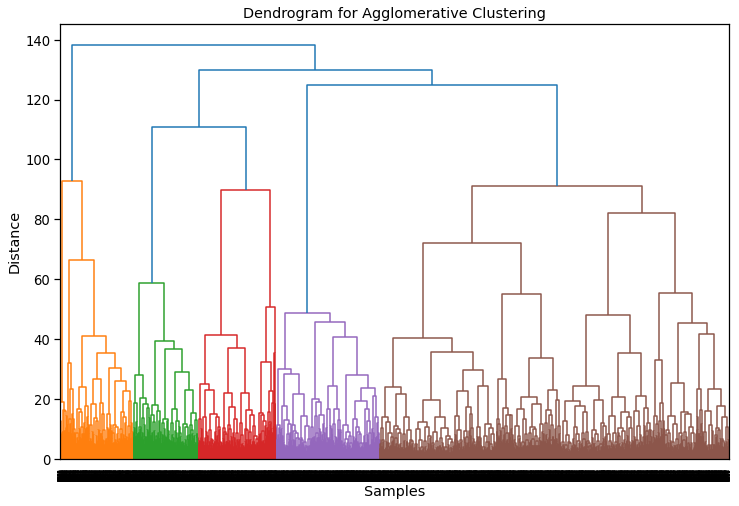

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage 

# Create linkage matrix and plot dendrogram
Z = linkage(df_std, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [120]:
# Interpret the clusters
cluster_df = pd.DataFrame(df_sample, columns=data.columns)
cluster_df['Cluster'] = agg_cluster.labels_

cluster_means = cluster_df.groupby('Cluster').mean()

for i in range(len(cluster_means)):
    print(f"Cluster {i+1} mean values:\n{cluster_means.iloc[i]}\n")

Cluster 1 mean values:
Patient_ID            NaN
SEX              1.908786
MARITAL          2.629779
EDUCA            4.703219
WEIGHT2               NaN
HEIGHT3               NaN
_INCOMG          3.439302
_BMI5         2933.698948
_AGEG5YR         8.221328
GENHLTH          2.934608
EXERANY2              NaN
EXRACT11              NaN
EXEROFT1       103.969484
EXERHMM1              NaN
EXRACT21              NaN
EXEROFT2              NaN
EXERHMM2              NaN
ALCDAY5               NaN
AVEDRNK2              NaN
MAXDRNKS         2.087860
DROCDY3_              NaN
_RFBING5              NaN
_DRNKWEK              NaN
_RFDRHV5              NaN
DRNKANY5              NaN
MENTHLTH         4.894702
FRUIT1         168.286385
FVBEANS               NaN
FVGREEN               NaN
FVORANG               NaN
VEGETAB1       178.796445
FRUTDA1_              NaN
BEANDAY_              NaN
GRENDAY_              NaN
ORNGDAY_              NaN
VEGEDA1_              NaN
_FRUTSUM              NaN
_VEGESUM       

In [121]:
#rows = data.loc[data['Patient_ID'] == 9]

#rows

In [122]:
#mask = data == 9
#rows = mask.any(axis=1)

# Count the number of 9 value in mask
#count = rows.sum()
#print(count)

In [123]:
#mask = data == 99
#rows = mask.any(axis=1)

# Count the number of 99 value in mask
#count = rows.sum()
#print(count)

In [124]:
#mask = data == 999
#rows = mask.any(axis=1)

# Count the number of 999 value in mask
#count = rows.sum()
#print(count)

In [125]:
#value = 9
# Calculate the number of columns that must hqve the value
#threshold = data.shape[1] * 0.25
#print(threshold)
#data['AVEDRNK2'].value_counts()

In [126]:
#def count_value(row):
#    return (row == value).sum()

In [127]:
## Apply the function to each row
#counts = data.apply(count_value, axis=1)
#counts

In [128]:
# Generate a list of row indices that meet the criteria
#rows_with_value = counts[counts > threshold].index.tolist()
#rows_with_value

In [129]:
#data = data.drop(rows_with_value)

In [130]:
# Define the columns of interest
cols = ['_BMI5', 'CVDSTRK3','ALCDAY5','EXERANY2','MENTHLTH','EXRACT11','AVEDRNK2','BPMEDS','SMOKDAY2']

# Extract the rows with valid values for the columns of interest
df_clean = data.loc[data[cols].notnull().all(axis=1)]

# Standardize the columns of interest
df_clean_std = (df_clean[cols] - df_clean[cols].mean()) / df_clean[cols].std()

<AxesSubplot:xlabel='_BMI5', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of _BMI5 Before Cleaning')

<AxesSubplot:xlabel='_BMI5', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of _BMI5 After Cleaning')

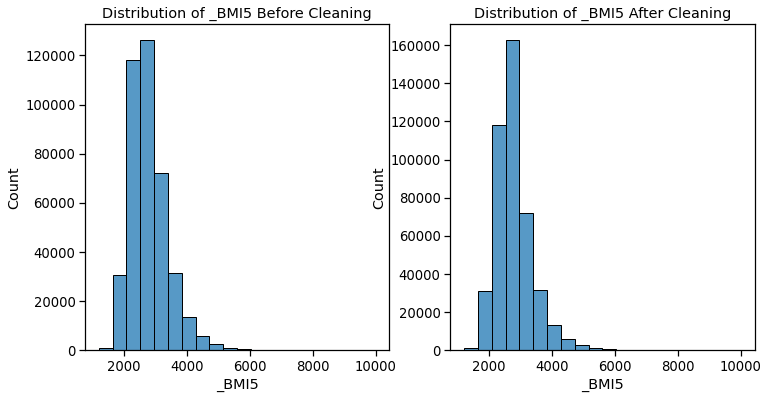

In [131]:
# Plot the distribution of _BMI5 before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['_BMI5'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of _BMI5 Before Cleaning')
sns.histplot(df_clean['_BMI5'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of _BMI5 After Cleaning')
plt.show()

<AxesSubplot:xlabel='CVDSTRK3', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CVDSTRK3 Before Cleaning')

<AxesSubplot:xlabel='CVDSTRK3', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CVDSTRK3 After Cleaning')

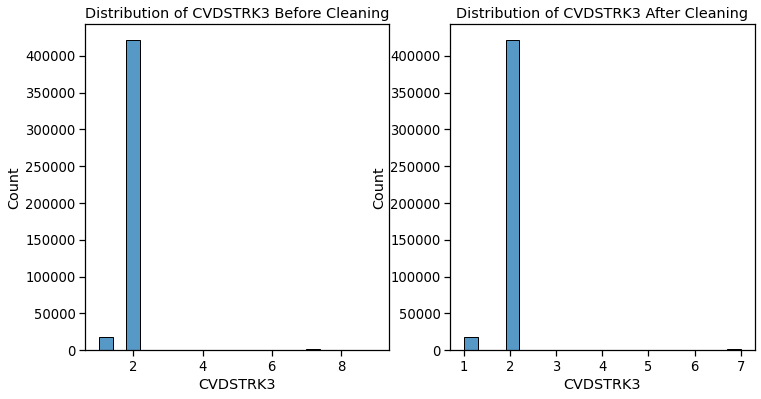

In [132]:
# Plot the distribution of PHYSHLTH before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['CVDSTRK3'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of CVDSTRK3 Before Cleaning')
sns.histplot(df_clean['CVDSTRK3'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of CVDSTRK3 After Cleaning')
plt.show()

<AxesSubplot:xlabel='EXRACT11', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of EXRACT11 Before Cleaning')

<AxesSubplot:xlabel='EXRACT11', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of EXRACT11 After Cleaning')

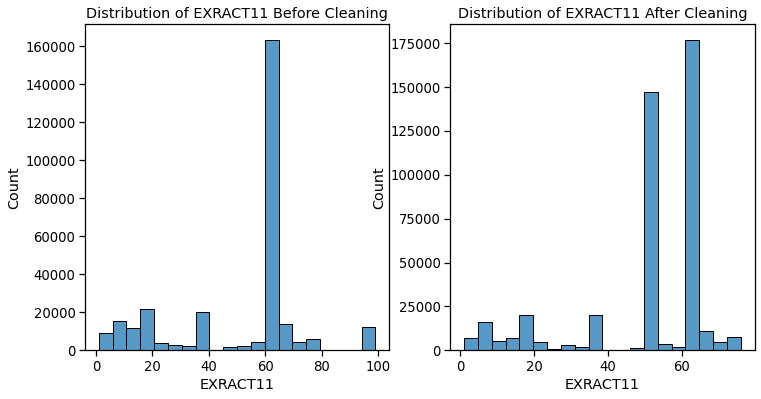

In [133]:
# Plot the distribution of PHYSHLTH before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['EXRACT11'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of EXRACT11 Before Cleaning')
sns.histplot(df_clean['EXRACT11'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of EXRACT11 After Cleaning')
plt.show()

<AxesSubplot:xlabel='AVEDRNK2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of AVEDRNK2 Before Cleaning')

<AxesSubplot:xlabel='AVEDRNK2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of AVEDRNK2 After Cleaning')

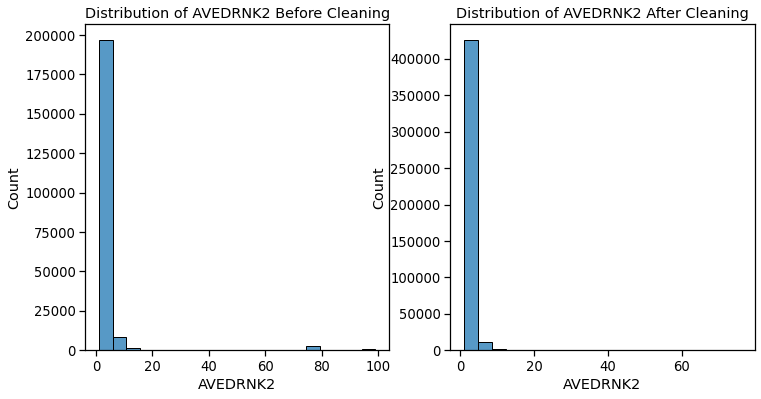

In [134]:
# Plot the distribution of AVEDRNK2 before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['AVEDRNK2'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of AVEDRNK2 Before Cleaning')
sns.histplot(df_clean['AVEDRNK2'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of AVEDRNK2 After Cleaning')
plt.show()

<AxesSubplot:xlabel='MENTHLTH', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MENTHLTH Before Cleaning')

<AxesSubplot:xlabel='MENTHLTH', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MENTHLTH After Cleaning')

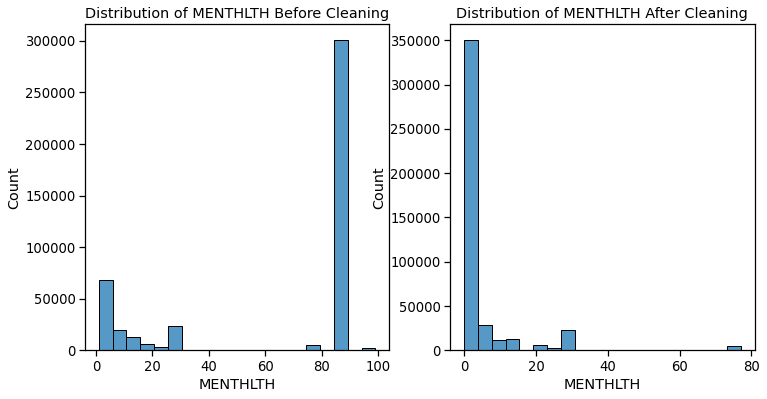

In [135]:
# Plot the distribution of AVEDRNK2 before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['MENTHLTH'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of MENTHLTH Before Cleaning')
sns.histplot(df_clean['MENTHLTH'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of MENTHLTH After Cleaning')
plt.show()

<AxesSubplot:xlabel='EXERANY2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of EXERANY2 Before Cleaning')

<AxesSubplot:xlabel='EXERANY2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of EXERANY2 After Cleaning')

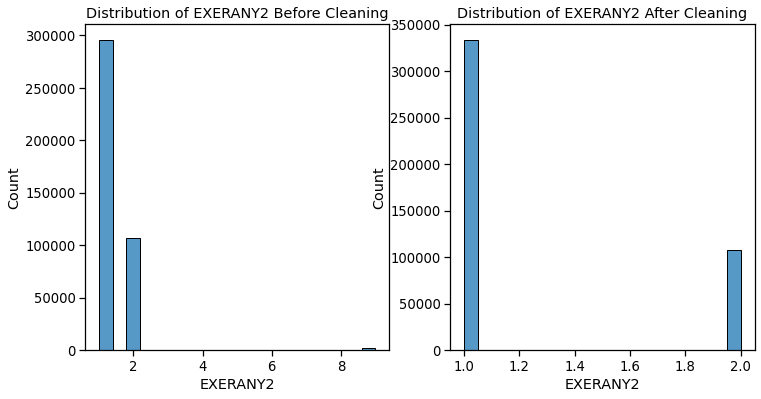

In [136]:
# Plot the distribution of AVEDRNK2 before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['EXERANY2'], bins=20, ax=axs[0])
axs[0].set_title('Distribution of EXERANY2 Before Cleaning')
sns.histplot(df_clean['EXERANY2'], bins=20, ax=axs[1])
axs[1].set_title('Distribution of EXERANY2 After Cleaning')
plt.show()